##**Feature Engineering**


1.   Feature Transformation
2.   Featute selection
3.   Feature construction
4.   Feature Extraction 



##**1.Feature Transformation**
## **--- Feature Scaling**




*   Standardization (Zero mmean Normalization)
*   Normalization

        1.Min-Max Normalization
        2.Robust Scaler
        3.Max Absolute
        4.Reburst Sacling

In [ ]:
# Fetch data(Social Network Adv Dataset)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day24-standardization/Social_Network_Ads.csv")
df = df.iloc[:,2:] # We take here only Age, salary, Purchased

In [ ]:
df.sample(5)

,Age,EstimatedSalary,Purchased
221,35,91000,1
224,35,60000,0
260,35,77000,0
11,26,52000,0
203,41,71000,0


In [ ]:
# Split the data into train and test
x = df.drop('Purchased',axis=1)
y = df["Purchased"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((280, 2), (120, 2))

###  **Standardization (Zero mean Normalization)**



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
# Fit and Transform with train data and Only Transform test data
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
# After scaled it give array so convert it in Dataframe
x_train_scaled = pd.DataFrame(x_train_scaled,columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)

In [ ]:
x_train_scaled.shape,x_test_scaled.shape

((280, 2), (120, 2))

In [ ]:
np.round(x_train.describe(),1) # Before Scaling

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [ ]:
np.round(x_train_scaled.describe(),1) # After Scaling std=1,mean=0

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


#### Effect of scaling(Visualization)

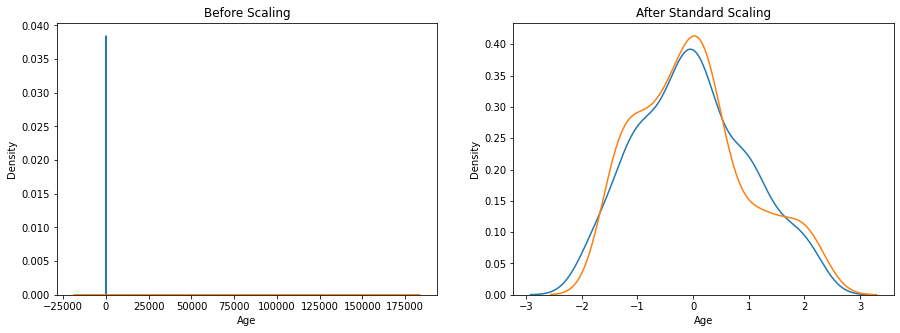

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))

# Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(x_train["Age"],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# After Scaling
ax2.set_title("After Standard Scaling")
sns.kdeplot(x_train_scaled["Age"],ax=ax2)
sns.kdeplot(x_train_scaled["EstimatedSalary"],ax=ax2)
plt.show()

#### Effect on Model

In [ ]:
# Before Scaling
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("Before Scaling",accuracy_score(y_test,y_pred))

Before Scaling 0.6583333333333333


In [ ]:
lr_scaled = LogisticRegression()
lr_scaled.fit(x_train_scaled,y_train)
y_pred_scaled = lr_scaled.predict(x_test_scaled)
print("After Scaling",accuracy_score(y_test,y_pred_scaled))

After Scaling 0.8666666666666667


In [ ]:
# Applying DecissionTree model (No changes in After Scaling)
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

dt.fit(x_train,y_train)
y_pred1 = dt.predict(x_test)
dt_scaled.fit(x_train_scaled,y_train)
y_pred2 = dt_scaled.predict(x_test_scaled)

print("Actual",accuracy_score(y_test,y_pred1))
print("Scaled",accuracy_score(y_test,y_pred2))

Actual 0.8666666666666667
Scaled 0.875


### **Min-Max Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_scaled2 = scaler.fit_transform(x_train)
x_test_scaled2 = scaler.transform(x_test)

In [ ]:
x_train_scaled2 = pd.DataFrame(x_train_scaled,columns = x_train.columns)
x_test_scaled2 = pd.DataFrame(x_test_scaled,columns = x_test.columns)

In [ ]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [ ]:
np.round(x_train_scaled2.describe(),1)# After Scaling min=0,max=1

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


#### Effect of scaling(Visualization)

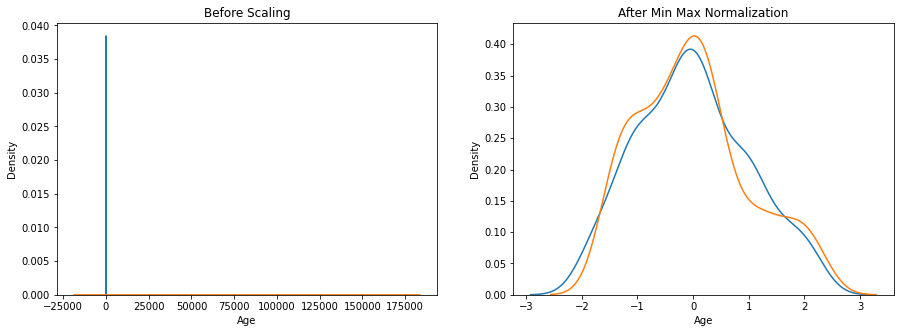

In [ ]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))

# Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(x_train["Age"],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# After Scaling
ax2.set_title("After Min Max Normalization")
sns.kdeplot(x_train_scaled2["Age"],ax=ax2)
sns.kdeplot(x_train_scaled2["EstimatedSalary"],ax=ax2)
plt.show()

#### Effect on Model

In [ ]:
lr_min_max = LogisticRegression()
lr_min_max.fit(x_train_scaled2,y_train)
y_pred3 = lr_min_max.predict(x_test_scaled2)

print("Before Scaling",accuracy_score(y_test,y_pred))
print("After Min_Max Scaling",accuracy_score(y_test,y_pred3))

Before Scaling 0.6583333333333333
After Min_Max Scaling 0.8666666666666667


###  **Mean Normalization, Robust Scaling, Max absolute**

In [ ]:
# Robust Scaling
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
x_train_rs = rs.fit_transform(x_train)
x_test_rs = rs.transform(x_test)

x_train_rs = pd.DataFrame(x_train_rs,columns = x_train.columns)
x_test_rs = pd.DataFrame(x_test_rs,columns = x_test.columns)

# Max Absolute Scaling
from sklearn.preprocessing import MaxAbsScaler
mb = MaxAbsScaler()
x_train_mb = mb.fit_transform(x_train)
x_test_mb = mb.transform(x_test)

x_train_mb = pd.DataFrame(x_train_mb,columns = x_train.columns)
x_test_mb = pd.DataFrame(x_test_mb,columns = x_test.columns)

In [ ]:
np.round(x_train_rs.describe(),1) # It effective when data have outliers

,Age,EstimatedSalary
count,280.0,280.0
mean,0.1,-0.0
std,0.6,0.8
min,-1.2,-1.2
25%,-0.4,-0.6
50%,0.0,0.0
75%,0.6,0.4
max,1.4,1.8


In [ ]:
np.round(x_train_mb.describe(),1) # It is use full in sparse matrix data

,Age,EstimatedSalary
count,280.0,280.0
mean,0.6,0.5
std,0.2,0.2
min,0.3,0.1
25%,0.5,0.3
50%,0.6,0.5
75%,0.8,0.6
max,1.0,1.0


#### Effect on visualization

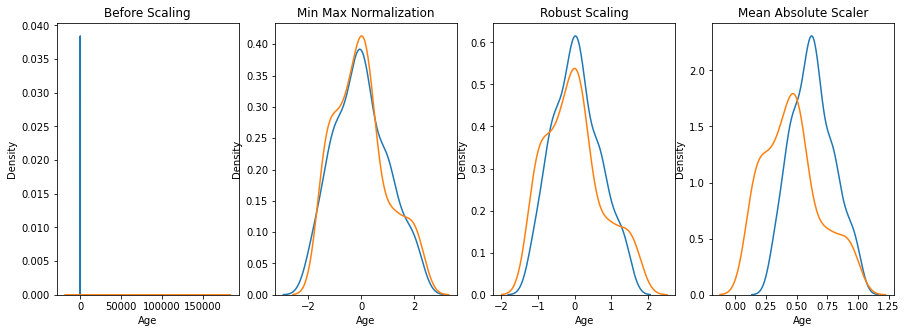

In [ ]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(ncols=4,figsize=(15,5))

# Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(x_train["Age"],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# Min-max Normalization
ax2.set_title("Min Max Normalization")
sns.kdeplot(x_train_scaled2["Age"],ax=ax2)
sns.kdeplot(x_train_scaled2["EstimatedSalary"],ax=ax2)

# Robust Scaling
ax3.set_title("Robust Scaling")
sns.kdeplot(x_train_rs["Age"],ax=ax3)
sns.kdeplot(x_train_rs["EstimatedSalary"],ax=ax3)

# Mean Absolute Scaling
ax4.set_title("Mean Absolute Scaler")
sns.kdeplot(x_train_mb["Age"],ax=ax4)
sns.kdeplot(x_train_mb["EstimatedSalary"],ax=ax4)
plt.show()

#### Effect on model

In [ ]:
lr_rs = LogisticRegression() 
lr_mb = LogisticRegression()

lr_rs.fit(x_train_rs,y_train)
y_pred_rs = lr_rs.predict(x_test_rs)

lr_mb.fit(x_train_mb,y_train)
y_pred_mb = lr_mb.predict(x_test_mb)
print("Before Scaling",accuracy_score(y_test,y_pred))
print("Min-max Normalization",accuracy_score(y_test,y_pred3))
print("Robust Scaler",accuracy_score(y_test,y_pred_rs))
print("MeanAbsolute Scaler",accuracy_score(y_test,y_pred_mb))

Before Scaling 0.6583333333333333
Min-max Normalization 0.8666666666666667
Robust Scaler 0.875
MeanAbsolute Scaler 0.8416666666666667


## **--- Categorical Encoding**   (Handling categorical feature)

1.   Ordinal
      *  Label Encoder
      *  Ordinal Encoder
2.   Nominal
      *   One Hot Encoding (ohe)


In [ ]:
import numpy as np
import pandas as pd
df1 = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day27-one-hot-encoding/cars.csv")
df1.sample(5)

,brand,km_driven,fuel,owner,selling_price
7055,Mahindra,70000,Diesel,Third Owner,550000
4835,Tata,120000,Diesel,Second Owner,300000
2868,Maruti,28000,Petrol,First Owner,680000
8014,Maruti,90000,Diesel,Second Owner,416000
4787,Jaguar,13500,Diesel,First Owner,2500000


In [ ]:
# Adding offer coloumn
df1.loc[df1["selling_price"] >=  700000,"offer"] = "yes"
df1.loc[df1["selling_price"] < 700000,"offer"] = "no"
df1["offer"].sample(5)

46       no
2651     no
1671    yes
5879     no
6782     no
Name: offer, dtype: object

In [ ]:
df1.sample(10)

,brand,km_driven,fuel,owner,selling_price,offer
4916,Maruti,70000,Petrol,Second Owner,150000,no
7880,Hyundai,25000,Petrol,First Owner,250000,no
4354,Chevrolet,70000,Diesel,Fourth & Above Owner,140000,no
3608,Maruti,40000,Petrol,First Owner,135000,no
7376,Maruti,51000,Petrol,First Owner,750000,yes
1294,Hyundai,50000,Diesel,First Owner,625000,no
1908,Honda,40000,Petrol,Third Owner,280000,no
7527,Honda,75000,Petrol,First Owner,280000,no
3623,Mahindra,120000,Diesel,Second Owner,290000,no
2136,Maruti,51777,Diesel,First Owner,750000,yes


In [ ]:
df1.isnull().sum()

brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
offer            0
dtype: int64

In [ ]:
df1["brand"].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

### Ohe with top categories of brand

In [ ]:
counts = df1["brand"].value_counts()
threshold = 100
repl = counts[counts <= threshold].index
df1_brand = pd.get_dummies(df1["brand"].replace(repl,"uncommon"))

In [ ]:
df1 = pd.concat([df1,df1_brand],axis=1)
df1 = df1.drop("brand",axis=1)

In [ ]:
df1.sample(5)

,km_driven,fuel,owner,selling_price,offer,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
4123,120000,Diesel,Second Owner,450000,no,0,0,0,0,0,1,0,0,0,0,0,0,0
7178,70000,Petrol,First Owner,2000000,yes,0,0,0,0,0,0,0,0,0,0,0,0,1
3781,30000,Petrol,First Owner,330000,no,0,0,0,0,0,0,1,0,0,0,0,0,0
7194,80000,Petrol,First Owner,229999,no,0,0,0,0,1,0,0,0,0,0,0,0,0
6822,33000,Diesel,First Owner,620000,no,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
x1 = df1.drop('offer',axis=1)
y1 = df1['offer']

In [ ]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.3,random_state=0)
x_train1.shape,x_test1.shape

((5689, 17), (2439, 17))

### **Label Encoding** (Apply only on output)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train1 = le.fit_transform(y_train1)
y_test1 = le.transform(y_test1)
le.classes_

array(['no', 'yes'], dtype=object)

### **Ordinal Encoding**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories=[['Test Drive Car','Fourth & Above Owner','Third Owner','Second Owner','First Owner']])
x_train_owner = oe.fit_transform(x_train1[["owner"]])
x_test_owner = oe.fit_transform(x_test1[["owner"]])
oe.categories_

[array(['Test Drive Car', 'Fourth & Above Owner', 'Third Owner',
        'Second Owner', 'First Owner'], dtype=object)]

In [ ]:
x_test_owner.shape

(2439, 1)

In [ ]:
x_train_owner.shape

(5689, 1)

### **One hot Encoding**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)
x_train_fuel_owner = ohe.fit_transform(x_train1[["fuel","owner"]])
x_test_fuel_owner = ohe.fit_transform(x_test1[["fuel","owner"]])
x_train_fuel_owner.shape

(5689, 7)

In [ ]:
x_test_fuel_owner.shape

(2439, 7)

### Extracting brand km_driven, selling_price

In [ ]:
x_train_km_driven_selling_price = x_train1.drop(columns=["fuel","owner"]).values

x_test_km_driven_selling_price =x_test1.drop(columns=["fuel","owner"]).values

In [ ]:
x_train_km_driven_selling_price.shape,x_test_km_driven_selling_price.shape

((5689, 15), (2439, 15))

### Concatinate all feature columns

In [ ]:
x_train_transformed = np.concatenate((x_train_owner,x_train_km_driven_selling_price,x_train_fuel_owner),axis=1)
x_test_transformed = np.concatenate((x_test_owner,x_test_km_driven_selling_price,x_test_fuel_owner),axis=1)

In [ ]:
x_train_transformed.shape,x_test_transformed.shape

((5689, 23), (2439, 23))

### Apply on Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dtc1 = DecisionTreeClassifier()
dtc1.fit(x_train_transformed,y_train1)
y_pred_transformed = dtc1.predict(x_test_transformed)
print("accuracy",accuracy_score(y_test1,y_pred_transformed))

accuracy 1.0


## **Scikit Learn Pipelines and Column Transformer**

In [ ]:
import numpy as np
import pandas as pd
df2 = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day29-sklearn-pipelines/train.csv")

In [ ]:
df2.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
473,474,1,2,"Jerwan, Mrs. Amin S (Marie Marthe Thuillard)",female,23.0,0,0,SC/AH Basle 541,13.7917,D,C
434,435,0,1,"Silvey, Mr. William Baird",male,50.0,1,0,13507,55.9000,E44,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
784,785,0,3,"Ali, Mr. William",male,25.0,0,0,SOTON/O.Q. 3101312,7.0500,NaN,S
350,351,0,3,"Odahl, Mr. Nils Martin",male,23.0,0,0,7267,9.2250,NaN,S


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df2.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
x_df2 = df2.drop(columns=["Survived"])
y_df2 = df2["Survived"]
x_df2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [ ]:
#Split data
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2 = train_test_split(x_df2,y_df2,test_size=0.2,random_state=42)
x_train2.shape,x_test2.shape,y_train2.shape,y_test2.shape

((712, 7), (179, 7), (712,), (179,))

In [ ]:
x_train2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5000,S
733,2,male,23.0,0,0,13.0000,S
382,3,male,32.0,0,0,7.9250,S
704,3,male,26.0,1,0,7.8542,S
813,3,female,6.0,4,2,31.2750,S


#### Coloumn Transformer

In [ ]:
from sklearn.compose import ColumnTransformer

# Inside Column Transformer
from sklearn.impute import SimpleImputer  # use for filling missing value
from sklearn.preprocessing import OneHotEncoder # Encoding categorical
from sklearn.preprocessing import MinMaxScaler # Feature Scaling
from sklearn.feature_selection import SelectKBest,chi2 # Select most effective columns
from sklearn.tree import DecisionTreeClassifier

### Imputation Transformer

In [ ]:
trf1 = ColumnTransformer([
    ("Impute_age",SimpleImputer(),[2]),
    ("Impute_embarked",SimpleImputer(strategy="most_frequent"),[6])
],remainder="passthrough")

### One hot Encoding

In [ ]:
trf2 = ColumnTransformer([
    ("ohe_sex",OneHotEncoder(sparse=False,handle_unknown="ignore"),[1,6])
],remainder="passthrough")
# In DecissionTree we use "handle_unknown" in ignore other than first drop

### Scaling (MinMax Scaler)

In [ ]:
trf3 = ColumnTransformer([("scale",MinMaxScaler(),slice(0,10))])  # Here 10 is total no of feature after ohe

### Select Most Effective Columns

In [ ]:
trf4 = SelectKBest(score_func=chi2,k=8)

### Train Model

In [ ]:
trf5 = DecisionTreeClassifier()

### Create Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
pipe = Pipeline([
    ("trf1",trf1),
    ("trf2",trf2),
    ("trf3",trf3),
    ("trf4",trf4),
    ("trf5",trf5)])


### Display the pipeline

In [ ]:
from sklearn import set_config
set_config(display="diagram")
pipe.fit(x_train2,y_train2)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Impute_age', SimpleImputer(),
                                                  [2]),
                                                 ('Impute_embarked',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  [6])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 6])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 10, None))])),
                ('trf4',
                 SelectKBest(k=8,
                             score_func=<function chi2 at 0x7fe6b43c9f80>)),
                ('trf5', DecisionTreeClassifier())])

### Explore the pipeline

In [ ]:
pipe.named_steps  # It shows all the pipeline process

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('Impute_age', SimpleImputer(), [2]),
                                 ('Impute_embarked',
                                  SimpleImputer(strategy='most_frequent'),
                                  [6])]),
 'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [1, 6])]),
 'trf3': ColumnTransformer(transformers=[('scale', MinMaxScaler(), slice(0, 10, None))]),
 'trf4': SelectKBest(k=8, score_func=<function chi2 at 0x7fe6b43c9f80>),
 'trf5': DecisionTreeClassifier()}

In [ ]:
# Explore inside the pipeline in details
pipe.named_steps['trf1'].transformers_

[('Impute_age', SimpleImputer(), [2]),
 ('Impute_embarked', SimpleImputer(strategy='most_frequent'), [6]),
 ('remainder', 'passthrough', [0, 1, 3, 4, 5])]

In [ ]:
pipe.named_steps['trf1'].transformers_[0]

('Impute_age', SimpleImputer(), [2])

In [ ]:
pipe.named_steps['trf1'].transformers_[0][1].statistics_  # Mean Imputed in missing value

array([29.49884615])

In [ ]:
pipe.named_steps['trf1'].transformers_[1][1].statistics_  # Most frequent value

array(['S'], dtype=object)

In [ ]:
pipe.named_steps["trf2"].transformers_

[('ohe_sex', OneHotEncoder(handle_unknown='ignore', sparse=False), [1, 6]),
 ('remainder', 'passthrough', [0, 2, 3, 4, 5])]

In [ ]:
pipe.named_steps["trf2"].transformers_[0][1].categories_

[array(['C', 'Q', 'S'], dtype=object),
 array([0.0, 4.0125, 5.0, 6.2375, 6.4375, 6.45, 6.4958, 6.75, 6.8583, 6.95,
        6.975, 7.05, 7.0542, 7.125, 7.1417, 7.225, 7.2292, 7.25, 7.3125,
        7.4958, 7.5208, 7.55, 7.6292, 7.65, 7.725, 7.7333, 7.7375, 7.7417,
        7.75, 7.775, 7.7958, 7.8, 7.8292, 7.8542, 7.8792, 7.8875, 7.8958,
        7.925, 8.0292, 8.05, 8.1125, 8.1375, 8.3, 8.3625, 8.4042, 8.5167,
        8.6542, 8.6625, 8.6833, 8.85, 9.0, 9.2167, 9.35, 9.475, 9.4833,
        9.5, 9.5875, 9.825, 9.8375, 9.8417, 10.1708, 10.4625, 10.5,
        10.5167, 11.1333, 11.2417, 11.5, 12.0, 12.275, 12.2875, 12.35,
        12.475, 12.525, 12.65, 13.0, 13.4167, 13.5, 13.7917, 13.8583,
        13.8625, 14.0, 14.1083, 14.4, 14.4542, 14.4583, 14.5, 15.0,
        15.0458, 15.05, 15.1, 15.2458, 15.5, 15.7417, 15.75, 15.85, 15.9,
        16.0, 16.1, 16.7, 17.4, 17.8, 18.0, 18.75, 18.7875, 19.2583, 19.5,
        19.9667, 20.2125, 20.25, 20.525, 20.575, 21.0, 21.075, 21.6792,
        22.025, 22.

In [ ]:
pipe.named_steps['trf3'].transformers_

[('scale', MinMaxScaler(), slice(0, 10, None)),
 ('remainder',
  'drop',
  [10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100,
   101,
   102,
   103,
   104,
   105,
   106,
   107,
   108,
   109,
   110,
   111,
   112,
   113,
   114,
   115,
   116,
   117,
   118,
   119,
   120,
   121,
   122,
   123,
   124,
   125,
   126,
   127,
   128,
   129,
   130,
   131,
   132,
   133,
   134,
   135,
   136,
 

In [ ]:
pipe.named_steps['trf3'].transformers_[0][1].n_features_in_ #Total no. of feature scaled

10

In [ ]:
y_pred_pipe = pipe.predict(x_test2)
y_pred_pipe

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0])

In [ ]:
# Accuracy Score
from sklearn.metrics import accuracy_score
accuracy_score(y_test2,y_pred_pipe)

0.6256983240223464

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe,x_train2,y_train2,cv=5,scoring='accuracy').mean()

0.6391214419383433

### Grid Search CV

In [ ]:
params = {
    'trf5_max_depth':[1,2,3,4,5,None]
    }

In [ ]:
#from sklearn.model_selection import GridSearchCV
#grid = GridSearchCV(pipe,params,cv=5,scoring='accuracy')
#grid.fit(x_train2,y_train2)

## **--- Mathematical Transformation** 
1. Function Transformer
          1.  Log Transformer (Right skwed)
          2.  Recipocal
          3.  Square(x**2) (Left skwed)
2. Power Transformer
          1.  Box-Cox
          2.  Yeo-Jhonshon


### **1. Function Transformer**

In [ ]:
import pandas as pd
import numpy as np

import scipy.stats as stats   # It is use for QQ plot
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [ ]:
df_mt = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day30-function-transformer/train.csv",usecols=['Age','Fare','Survived'])
df_mt.head() 

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df_mt.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
# Filling Null value
df_mt['Age'].fillna(df_mt["Age"].mean(),inplace=True)
df_mt.sample(5)

,Survived,Age,Fare
754,1,48.000000,65.0000
769,0,32.000000,8.3625
505,0,18.000000,108.9000
868,0,29.699118,9.5000
2,1,26.000000,7.9250


In [ ]:
x = df_mt.iloc[:,1:3]
y = df_mt.iloc[:,0]

In [ ]:
# Split Data
from sklearn.model_selection import train_test_split
x_train_mt,x_test_mt,y_train_mt,y_test_mt = train_test_split(x,y,test_size=0.2,random_state=42)
x_train_mt.shape,x_test_mt.shape

((712, 2), (179, 2))

#### Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


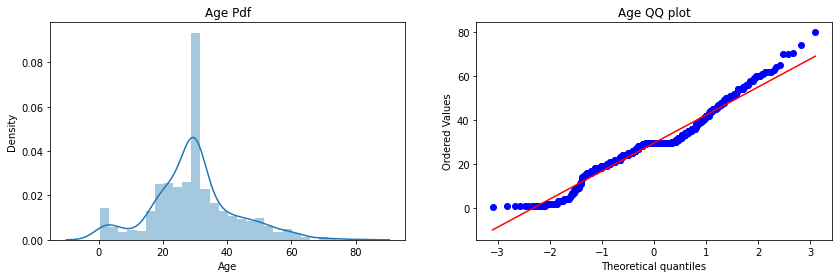

In [ ]:
# Pde Plot
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train_mt['Age'])
plt.title('Age Pdf')

# QQ Plot
plt.subplot(122)
stats.probplot(x_train_mt['Age'],dist='norm',plot=plt)
plt.title('Age QQ plot')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


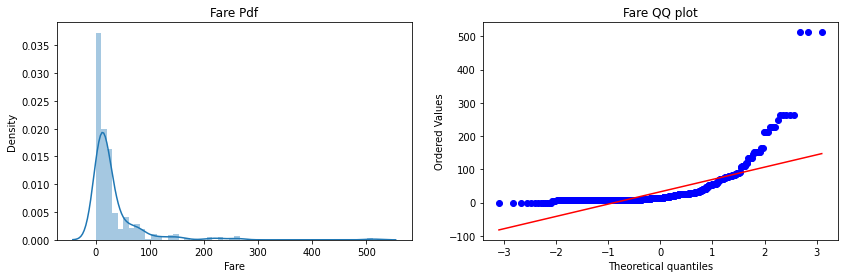

In [ ]:
plt.figure(figsize = (14,4))
# Pde plot
plt.subplot(121)
sns.distplot(x_train_mt["Fare"])
plt.title("Fare Pdf")

# QQ Plot
plt.subplot(122)
stats.probplot(x_train_mt["Fare"],dist="norm",plot=plt)
plt.title("Fare QQ plot")
plt.show()

#### Without Function Transformer

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

lr_wt = LogisticRegression()
dt_wt = DecisionTreeClassifier()

lr_wt.fit(x_train_mt,y_train_mt)
dt_wt.fit(x_train_mt,y_train_mt)

y_pred_wt = lr_wt.predict(x_test_mt)
y_pred_wt1 = dt_wt.predict(x_test_mt)

print("Accuracy LR",accuracy_score(y_test_mt,y_pred_wt))
print("Accuracy DT",accuracy_score(y_test_mt,y_pred_wt1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.659217877094972


### After Function Transformer (Log Transformer)

In [ ]:
# Apply log Transformer in both columns
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

trf_ft1 = FunctionTransformer(func=np.log1p)

x_train_trf_mt = trf_ft1.fit_transform(x_train_mt)
x_test_trf_mt = trf_ft1.transform(x_test_mt)

#### Visualization

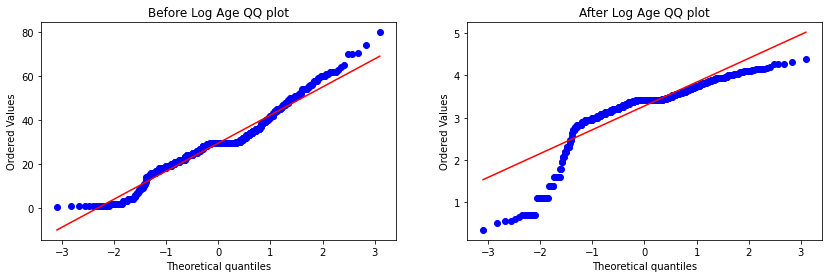

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train_mt["Age"],dist="norm",plot=plt)
plt.title("Before Log Age QQ plot")

plt.subplot(122)
stats.probplot(x_train_trf_mt["Age"],dist="norm",plot=plt)
plt.title("After Log Age QQ plot")
plt.show()

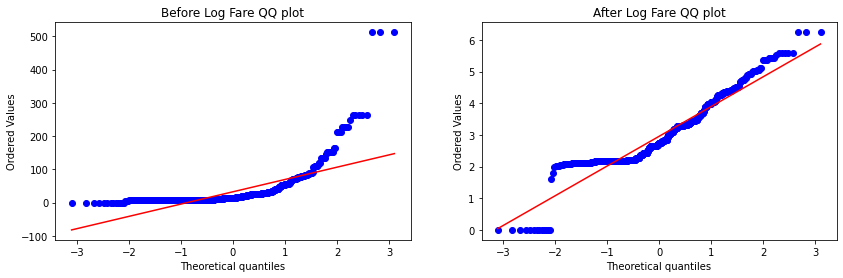

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train_mt["Fare"],dist="norm",plot=plt)
plt.title("Before Log Fare QQ plot")

plt.subplot(122)
stats.probplot(x_train_trf_mt["Fare"],dist="norm",plot=plt)
plt.title("After Log Fare QQ plot")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


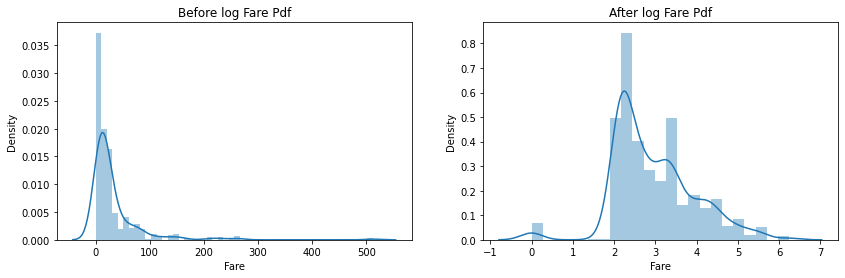

In [ ]:
plt.figure(figsize = (14,4))
# Pde plot
plt.subplot(121)
sns.distplot(x_train_mt["Fare"])
plt.title("Before log Fare Pdf")

plt.subplot(122)
sns.distplot(x_train_trf_mt["Fare"])
plt.title("After log Fare Pdf")
plt.show()

#### Apply Model

In [ ]:
lr_mt = LogisticRegression()
dt_mt = DecisionTreeClassifier()

lr_mt.fit(x_train_trf_mt,y_train_mt)
dt_mt.fit(x_train_trf_mt,y_train_mt)

y_pred_lr_mt = lr_mt.predict(x_test_trf_mt)
y_pred_dt_mt = dt_mt.predict(x_test_trf_mt)

print("Accuracy of LR",accuracy_score(y_test_mt,y_pred_lr_mt))
print("Accuracy of DT",accuracy_score(y_test_mt,y_pred_dt_mt))

Accuracy of LT 0.6815642458100558
Accuracy of DT 0.6871508379888268


#### Apply Cross_val Score

In [ ]:
x_transformed = trf_ft1.fit_transform(x)

print("LR",np.mean(cross_val_score(lr_mt,x_transformed,y,scoring="accuracy",cv=10)))
print("DT",np.mean(cross_val_score(dt_mt,x_transformed,y,scoring="accuracy",cv=10)))

LR 0.678027465667915
DT 0.6610861423220974


#### Function for All Function Transformer (Sine,Square,Square root,Recipocal)

In [ ]:
def apply_transformer(transform):

  x = df_mt.iloc[:,1:3]
  y = df_mt.iloc[:,0]

  trf = ColumnTransformer([("log",FunctionTransformer(transform),['Fare'])],remainder='passthrough')

  x_trans = trf.fit_transform(x)

  clf = LogisticRegression()
  print("Accuracy",np.mean(cross_val_score(clf,x_trans,y,scoring="accuracy",cv=10)))

  plt.figure(figsize=(14,4))

  plt.subplot(121)
  stats.probplot(x['Fare'],dist="norm", plot=plt)
  plt.title('Fare Before Transform')

  plt.subplot(122)
  stats.probplot(x_trans[:,0], dist="norm", plot=plt)
  plt.title('Fare After Transform')

  plt.show()

Accuracy 0.6195131086142323


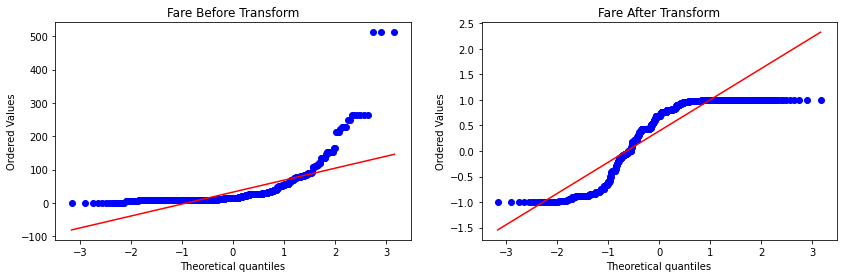

In [ ]:
apply_transformer(np.sin) ## Sine Function Transformer

Accuracy 0.6442446941323345


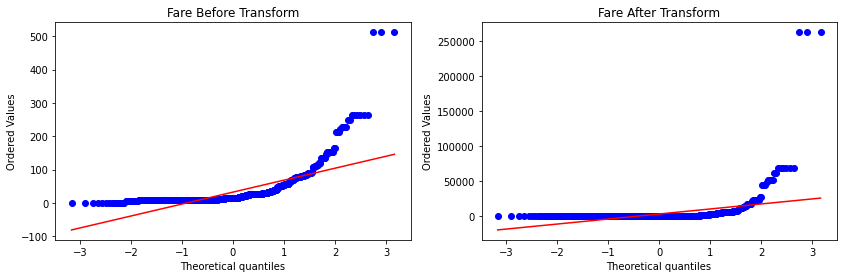

In [ ]:
apply_transformer(lambda x: x**2) # Square Function Transformer

Accuracy 0.6589013732833957


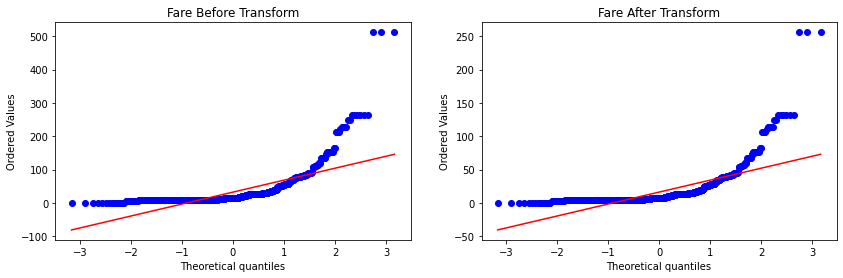

In [ ]:
apply_transformer(lambda x: x**1/2) # Square root Function Transformer

Accuracy 0.61729088639201


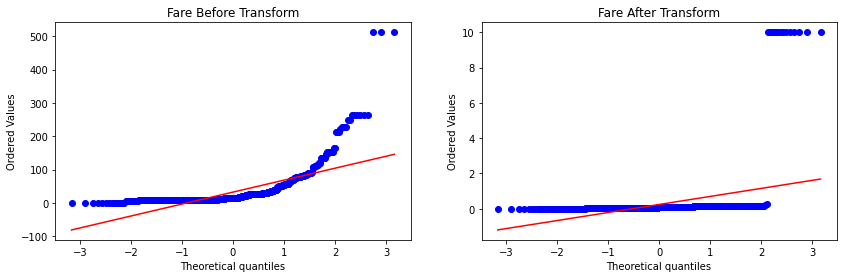

In [ ]:
apply_transformer(lambda x: 1/(x+0.1)) # Recipocal Function Transformer

### **2. Power Transformer**

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats # For QQ plot

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [ ]:
df_pt = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day31-power-transformer/concrete_data.csv")
df_pt.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
df_pt.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [ ]:
x_pt = df_pt.drop(columns=["Strength"])
y_pt = df_pt.iloc[:,-1]

In [ ]:
x_train_pt,x_test_pt,y_train_pt,y_test_pt = train_test_split(x_pt,y_pt,test_size=0.2,random_state=42)
x_train_pt.shape,x_test_pt.shape

((824, 8), (206, 8))

#### Without Power Transformer

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr_pt = LinearRegression()

lr_pt.fit(x_train_pt,y_train_pt)
y_pred_pt = lr_pt.predict(x_test_pt)

print("R Square Accuracy",r2_score(y_test_pt,y_pred_pt))

R Square Accuracy 0.6275531792314853


#### Cross_val_score 

In [ ]:
print("Cross_val_score",np.mean(cross_val_score(lr_pt,x_pt,y_pt,scoring="r2")))

Cross_val_score 0.4609940491662865


#### Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


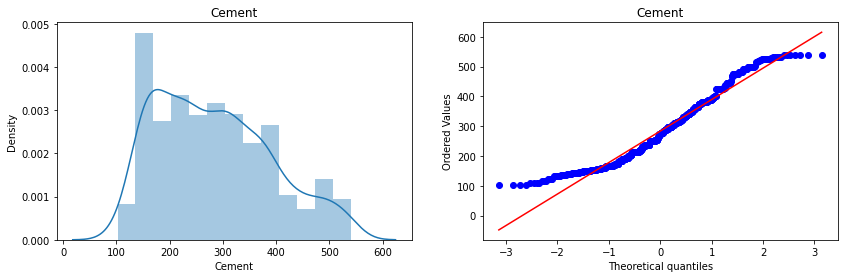

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


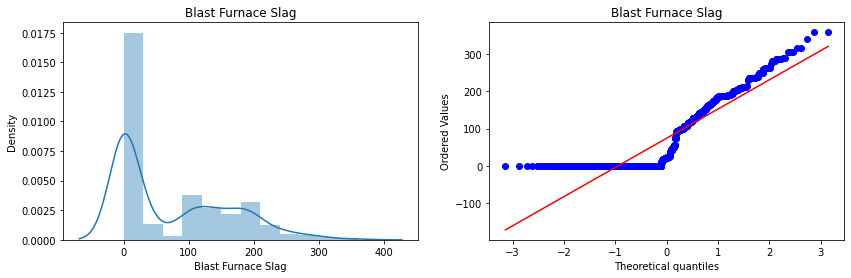

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


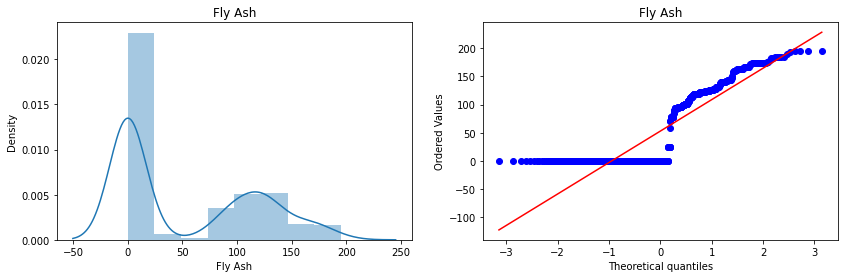

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


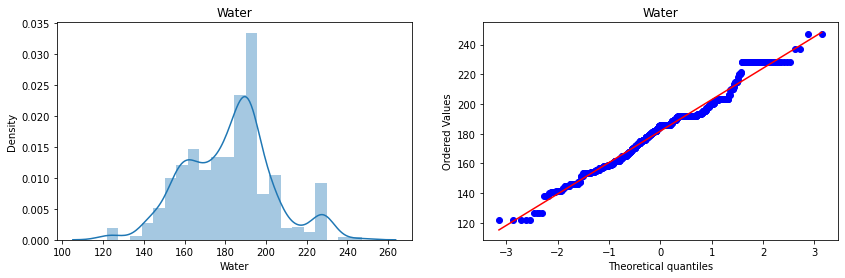

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


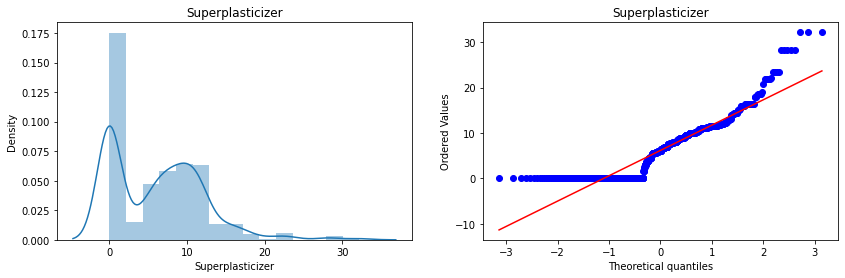

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


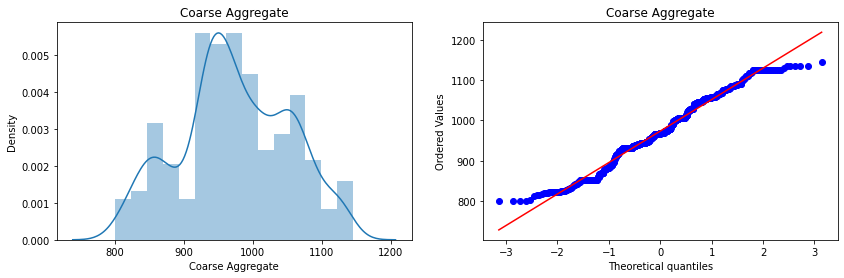

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


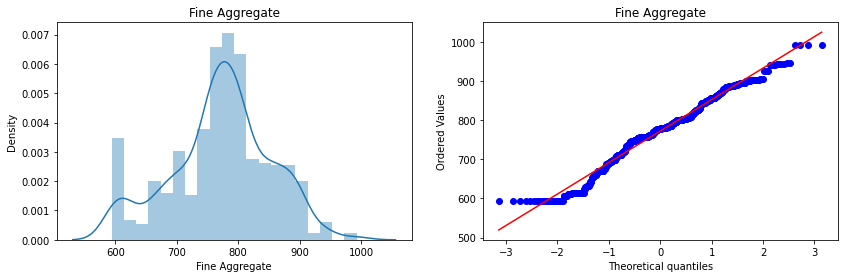

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


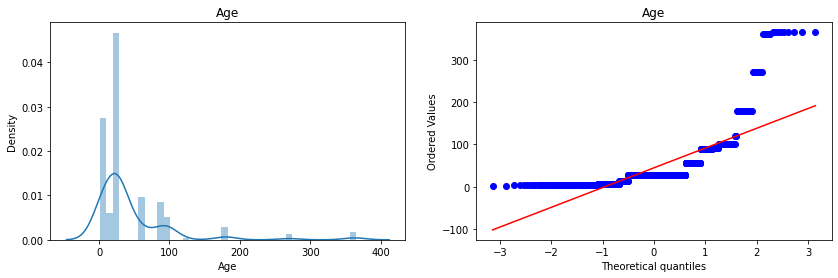

In [ ]:
for col in x_train_pt.columns:
  plt.figure(figsize=(14,4))

  plt.subplot(121)
  sns.distplot(x_train_pt[col])
  plt.title(col)

  plt.subplot(122)
  stats.probplot(x_train_pt[col],dist="norm",plot=plt)
  plt.title(col)

  plt.show()

#### **Box - Cox Transformer**

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'box-cox')

x_train_pt_trans = pt.fit_transform(x_train_pt + 0.000001)
x_test_pt_trans = pt.transform(x_test_pt + 0.000001)

pd.DataFrame({'cols':x_train_pt.columns,'box-cox-lambda':pt.lambdas_})

,cols,box-cox-lambda
0,Cement,0.177025
1,Blast Furnace Slag,0.025093
2,Fly Ash,-0.038970
3,Water,0.772682
4,Superplasticizer,0.098811
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782019
7,Age,0.066631


#### Apply Model

In [ ]:
lr_box_cox = LinearRegression()

lr_box_cox.fit(x_train_pt_trans,y_train_pt)
y_pred_box_cox = lr_box_cox.predict(x_test_pt_trans)

print("R Square Accuracy",r2_score(y_test_pt,y_pred_box_cox))

R Square Accuracy 0.8047825006181188


In [ ]:
x_trans_box_cox = pt.fit_transform(x_pt + 0.000001)
print("Cross_val_score",np.mean(cross_val_score(lr_box_cox,x_trans_box_cox,y_pt,scoring="r2")))

Cross_val_score 0.6662950327869241


#### Visualization of Before and After Box-Cox

In [ ]:
x_train_pt_trans = pd.DataFrame(x_test_pt_trans,columns=x_train_pt.columns)
x_train_pt_trans.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-0.007053,0.919917,-0.887212,2.122583,-1.302107,-0.532331,-1.248266,2.510590
1,0.813145,0.988711,-0.887212,-0.787479,0.829914,-0.371541,-0.243146,-1.031008
2,1.011917,0.988711,-0.887212,-1.710726,1.003993,-0.371541,-0.243146,0.106010
3,0.813145,0.988711,-0.887212,-0.787479,0.829914,-0.371541,-0.243146,-1.675970
4,-1.488791,-1.085667,1.159857,0.949073,0.733792,-1.887834,1.225558,0.106010


#### Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


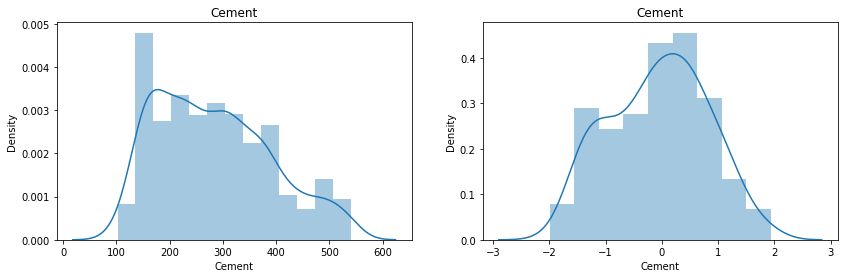

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


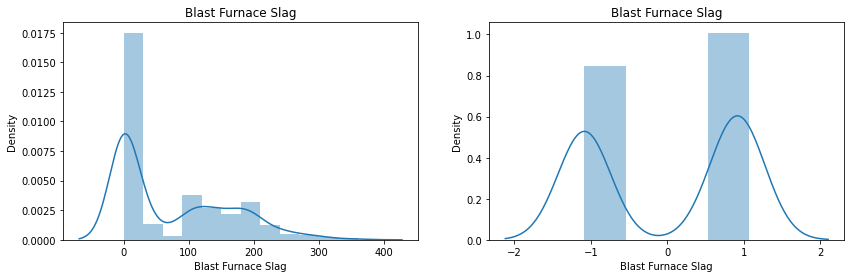

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


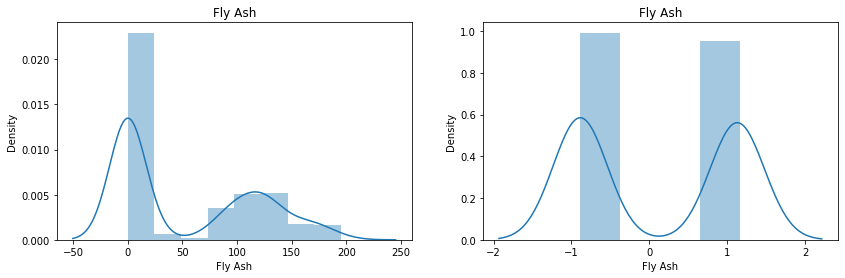

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


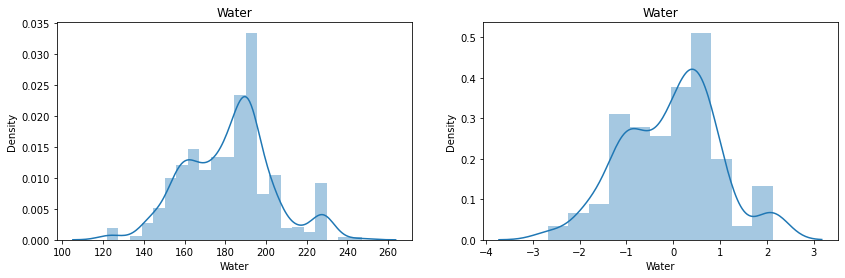

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


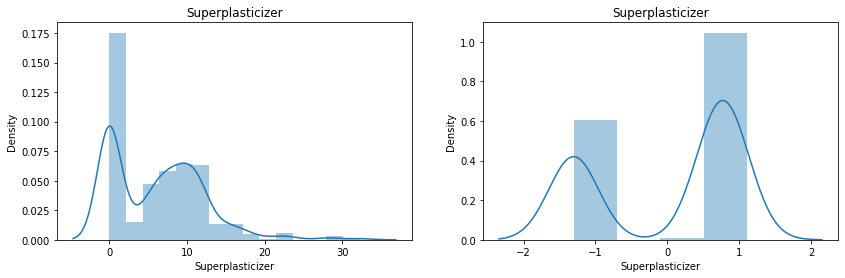

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


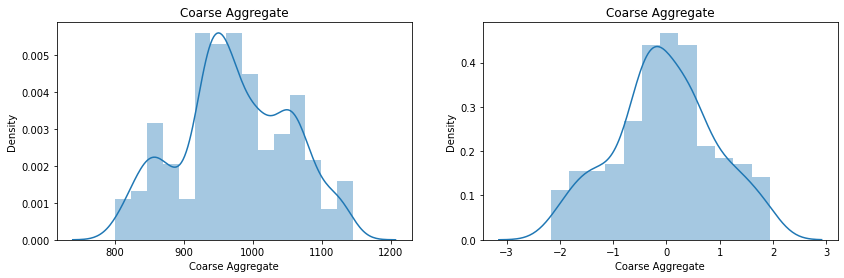

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


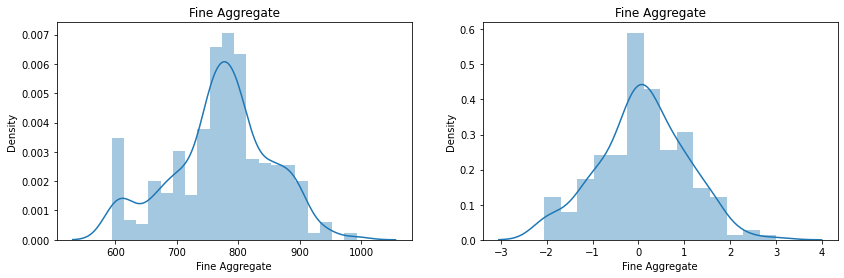

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


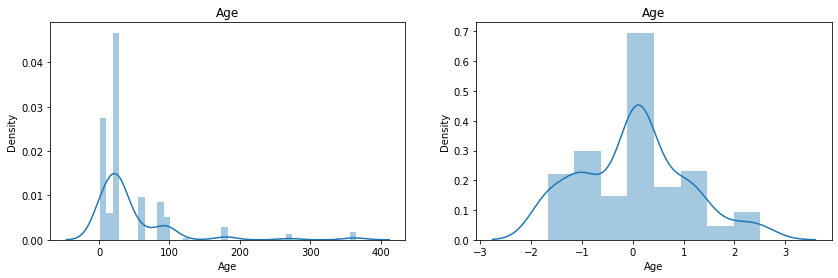

In [ ]:
for col in x_train_pt_trans.columns:
  plt.figure(figsize=(14,4))

  plt.subplot(121)
  sns.distplot(x_train_pt[col])
  plt.title(col)

  plt.subplot(122)
  sns.distplot(x_train_pt_trans[col])
  plt.title(col)
  plt.show()

#### **Yeo - Jhonson Transformer**

In [ ]:
pt1 = PowerTransformer() # Yeo -jhonson is defualt

x_train_pt_trans2 = pt1.fit_transform(x_train_pt)
x_test_pt_trans2 = pt1.transform(x_test_pt)

pd.DataFrame({'cols':x_train_pt.columns,"yeo_Jhonson_lambdas": pt1.lambdas_})

,cols,yeo_Jhonson_lambdas
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


#### Apply Model

In [ ]:
lr_yeo = LinearRegression()
lr_yeo.fit(x_train_pt_trans2,y_train_pt)

y_perd_yeo = lr_yeo.predict(x_test_pt_trans2)
print("R Square Accuracy",r2_score(y_test_pt,y_perd_yeo))

R Square Accuracy 0.8161906513354853


In [ ]:
x_trans_yeo = pt1.fit_transform(x_pt + 0.000001)
print("Cross_val_score",np.mean(cross_val_score(lr_yeo,x_trans_yeo,y_pt,scoring="r2")))

Cross_val_score 0.6834625228904349


In [ ]:
x_train_pt_trans2 = pd.DataFrame(x_train_pt_trans2,columns = x_train_pt.columns)
x_train_pt_trans2.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,-1.279751,1.018168,1.130993,-0.301917,1.250424,-0.262504,-0.677567,0.105778
1,1.244813,0.222584,1.166671,-0.165051,0.643937,-1.912717,-0.314063,0.105778
2,0.079751,-1.056928,1.143637,-1.047299,0.796163,1.018407,0.025954,-1.664976
3,-0.145770,0.835725,1.009268,0.581232,0.585508,-1.750770,0.583249,0.105778
4,-1.131111,0.487511,1.150162,-1.105305,0.886463,1.368579,0.262619,-1.664976


#### Visualization of Before and After Yeo - Jhonson

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


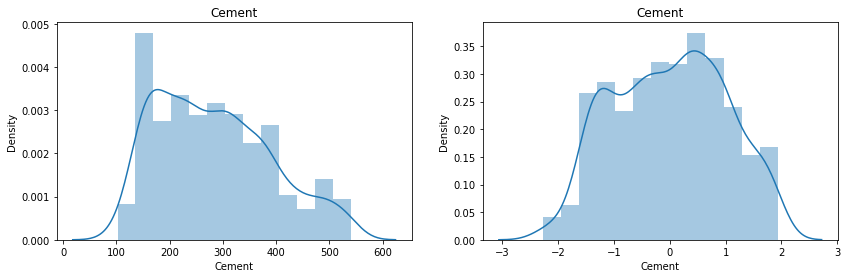

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


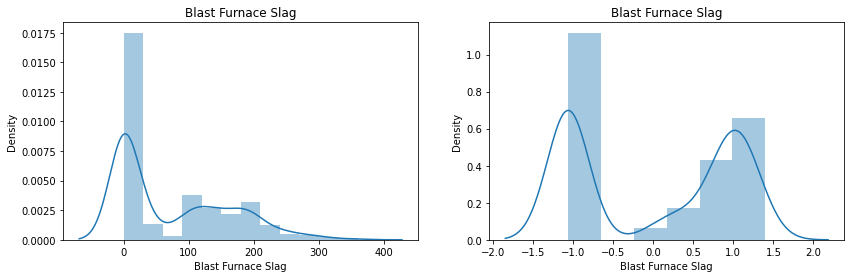

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


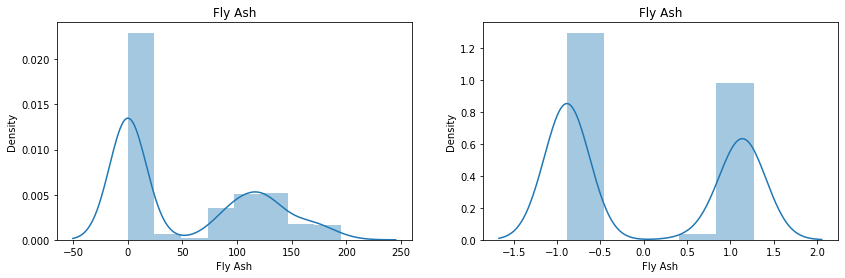

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


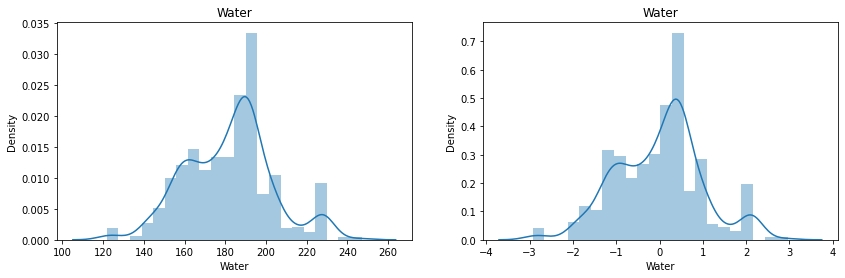

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


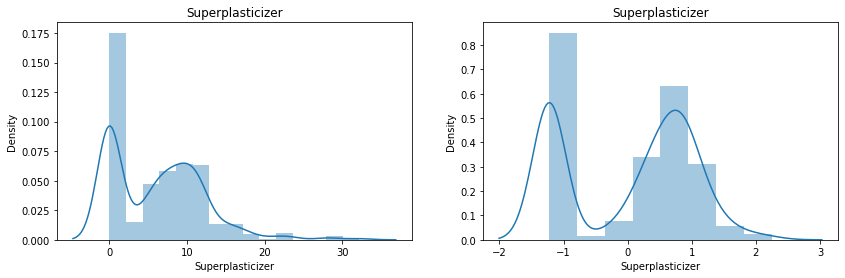

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


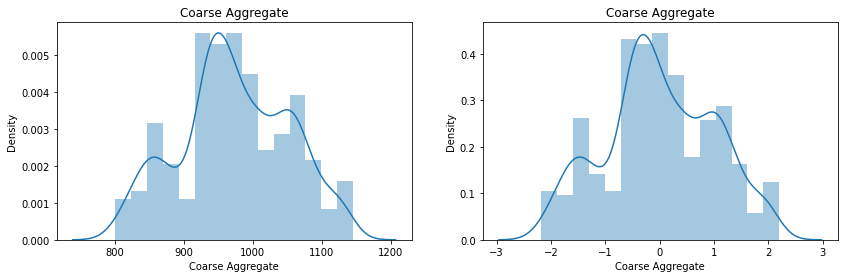

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


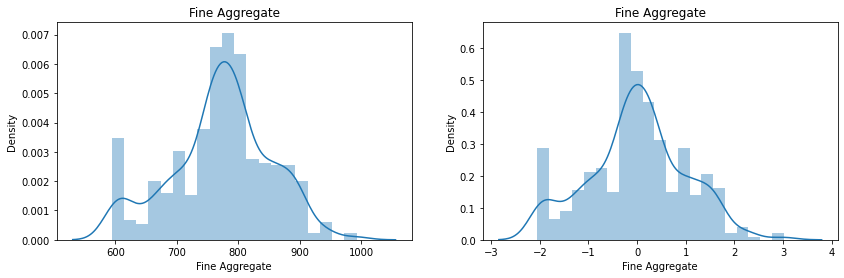

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


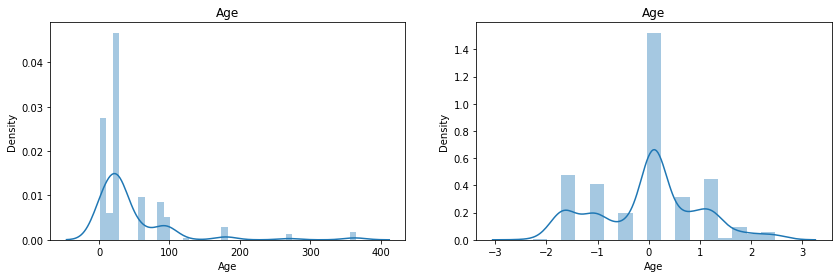

In [ ]:
for col in x_train_pt_trans2.columns:
  plt.figure(figsize=(14,4))

  plt.subplot(121)
  sns.distplot(x_train_pt[col])
  plt.title(col)

  plt.subplot(122)
  sns.distplot(x_train_pt_trans2[col])
  plt.title(col)
  plt.show()

In [ ]:
# Side by side Lambdas
pd.DataFrame({'cols':x_train_pt.columns,'box_cox_lambdas':pt.lambdas_,'Yeo_Johnson_lambdas':pt1.lambdas_})

,cols,box_cox_lambdas,Yeo_Johnson_lambdas
0,Cement,0.172271,0.169544
1,Blast Furnace Slag,0.025273,0.016633
2,Fly Ash,-0.032412,-0.136480
3,Water,0.809568,0.808438
4,Superplasticizer,0.099711,0.264160
5,Coarse Aggregate,1.129168,1.129395
6,Fine Aggregate,1.829625,1.830764
7,Age,0.048975,0.001771


## **--- Encoding Numerical** (Numerical to categorical)

1.  Discretization or Binning 
          1.  Unsupervised 
              *   Equal width (Uniform)
              *   Equal Frequency (Quantile)
              *   K means Binning
          2.  Supervised
              *   Decission Tree Binning
          3.  Custom Binning
2.  Binarization


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer

In [ ]:
df_bin = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day32-binning-and-binarization/train.csv",usecols=["Age","Fare","Survived"])
df_bin.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df_bin.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [ ]:
df_bin.dropna(inplace=True)
df_bin.shape

(714, 3)

In [ ]:
x_bin = df_bin.iloc[:,1:]
y_bin = df_bin.iloc[:,0]

In [ ]:
x_train_bin,x_test_bin,y_train_bin,y_test_bin = train_test_split(x_bin,y_bin,test_size=0.2,random_state=42)
x_train_bin.shape,x_test_bin.shape

((571, 2), (143, 2))

#### Without Binning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_bin = DecisionTreeClassifier()

clf_bin.fit(x_train_bin,y_train_bin)
y_pred_bin = clf_bin.predict(x_test_bin)

print("Accuracy Score",accuracy_score(y_test_bin,y_pred_bin))
print("cross_val_score",np.mean(cross_val_score(clf_bin,x_bin,y_bin,cv=10,scoring="accuracy")))

Accuracy Score 0.6363636363636364
cross_val_score 0.62466744913928


#### **Discretization Or Binning**
### Equal width (Uniform)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

kbin_age = KBinsDiscretizer(n_bins=15,encode="ordinal",strategy="uniform") 
kbin_fare = KBinsDiscretizer(n_bins=15,encode="ordinal",strategy="uniform")

In [ ]:
trf_uni = ColumnTransformer([
    ("First",kbin_age,[0]),
    ("Second",kbin_fare,[1])
])

x_train_trf_uni = trf_uni.fit_transform(x_train_bin)
x_test_trf_uni = trf_uni.transform(x_test_bin)

#### To See Bin Values

In [ ]:
trf_uni.named_transformers_["First"].bin_edges_[0].tolist()

[0.42,
 5.725333333333333,
 11.030666666666667,
 16.336000000000002,
 21.641333333333336,
 26.94666666666667,
 32.252,
 37.55733333333333,
 42.86266666666667,
 48.168000000000006,
 53.473333333333336,
 58.778666666666666,
 64.084,
 69.38933333333334,
 74.69466666666666,
 80.0]

In [ ]:
trf_uni.named_transformers_["Second"].bin_edges_

array([array([  0.     ,  34.15528,  68.31056, 102.46584, 136.62112, 170.7764 ,
              204.93168, 239.08696, 273.24224, 307.39752, 341.5528 , 375.70808,
              409.86336, 444.01864, 478.17392, 512.3292 ])                     ],
      dtype=object)

In [ ]:
output_1 = pd.DataFrame({"age":x_train_bin["Age"],
                         "age_trf_bin":x_train_trf_uni[:,0],
                         "fare":x_train_bin["Fare"],
                         "fare_trf_bin":x_train_trf_uni[:,1]})

output_1["age_labels"] = pd.cut(x = x_train_bin["Age"],bins = trf_uni.named_transformers_["First"].bin_edges_[0].tolist())
output_1["fare_labels"] = pd.cut(x = x_train_bin["Fare"],bins = trf_uni.named_transformers_["Second"].bin_edges_[0].tolist())

output_1.sample(3)

,age,age_trf_bin,fare,fare_trf_bin,age_labels,fare_labels
135,23.0,4.0,15.0458,0.0,"(21.641, 26.947]","(0.0, 34.155]"
430,28.0,5.0,26.5500,0.0,"(26.947, 32.252]","(0.0, 34.155]"
634,9.0,1.0,27.9000,0.0,"(5.725, 11.031]","(0.0, 34.155]"


#### Apply on Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf_uni = DecisionTreeClassifier()

clf_uni.fit(x_train_trf_uni,y_train_bin)
y_pred_uni = clf_uni.predict(x_test_trf_uni)

print("Accuracy_Score",accuracy_score(y_test_bin,y_pred_uni))

Accuracy_Score 0.6223776223776224


In [ ]:
# Cross_val_score
x_uni = trf_uni.fit_transform(x_bin)
print("Cross_val_score",np.mean(cross_val_score(clf_uni,x_uni,y_bin,cv=10,scoring="accuracy"))) 

Cross_val_score 0.6541275430359936


### Equal Frequency (Quantile)

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

kbin_age2 = KBinsDiscretizer(n_bins=15,encode="ordinal",strategy="quantile")
kbin_fare2 = KBinsDiscretizer(n_bins=15,encode="ordinal",strategy="quantile")

In [ ]:
trf_quan = ColumnTransformer([
    ("First",kbin_age2,[0]),
    ("Second",kbin_fare2,[1])
])

x_train_trf_quan = trf_quan.fit_transform(x_train_bin)
x_test_trf_quan = trf_quan.transform(x_test_bin)

#### Apply on Model

In [ ]:
clf_quan = DecisionTreeClassifier()

clf_quan.fit(x_train_trf_quan,y_train_bin)
y_pred_quan = clf_quan.predict(x_test_trf_quan)

print("Accuracy_Score",accuracy_score(y_test_bin,y_pred_quan))

# Cross_val_score
x_quan = trf_quan.fit_transform(x_bin)
print("Cross_val_score",np.mean(cross_val_score(clf_quan,x_quan,y_bin,cv=10,scoring="accuracy")))

Accuracy_Score 0.6363636363636364
Cross_val_score 0.6723004694835681


### K Means Binning

In [ ]:
kbin_age3 = KBinsDiscretizer(n_bins=15,encode="ordinal",strategy="kmeans")
kbin_fare3 = KBinsDiscretizer(n_bins=15,encode="ordinal",strategy="kmeans")

trf_kmean = ColumnTransformer([
    ("First",kbin_age3,[0]),
    ("Second",kbin_fare3,[1])
])

x_train_trf_kmean = trf_kmean.fit_transform(x_train_bin)
x_test_trf_kmean = trf_kmean.transform(x_test_bin)

#### Apply on Model

In [ ]:
clf_kmean = DecisionTreeClassifier()
clf_kmean.fit(x_train_trf_kmean,y_train_bin)
y_pred_kmean =clf_kmean.predict(x_test_trf_kmean)

print("Accuracy_Score",accuracy_score(y_test_bin,y_pred_kmean))

# Cross_val_score
x_kmean = trf_kmean.fit_transform(x_bin)
print("Cross_val_score",np.mean(cross_val_score(clf_kmean,x_kmean,y_bin,cv=10,scoring="accuracy")))

Accuracy_Score 0.6293706293706294
Cross_val_score 0.6556142410015648


#### Visualizatrion

In [ ]:
pd.DataFrame({"Binning":["Uniform","Quantile","Kmean"],"Accuracy_score":[0.62,0.63,0.62],"Cross_val_score":[0.65,0.67,0.65]})

,Binning,Accuracy_score,Cross_val_score
0,Uniform,0.62,0.65
1,Quantile,0.63,0.67
2,Kmean,0.62,0.65


In [ ]:
# Function to plot Uniform, Quantile, Kmean of Age and Fare
def discretize(bins,strategy):

  kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
  kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

  trf = ColumnTransformer([
      ('First',kbin_age,[0]),
      ('Second',kbin_fare,[1])
  ])

  x_trf = trf.fit_transform(x_bin)
  print("Cross_val_score",np.mean(cross_val_score(DecisionTreeClassifier(),x_bin,y_bin,cv=10,scoring='accuracy')))

  plt.Figure(figsize=(14,8))

  plt.subplot(121)
  plt.hist(x_bin['Age'])
  plt.title("Before Age")

  plt.subplot(122)
  plt.hist(x_trf[:,0],color='red')
  plt.title('After Age')
  plt.show()

  plt.Figure(figsize=(14,8))

  plt.subplot(121)
  plt.hist(x_bin['Fare'])
  plt.title("Before Fare")

  plt.subplot(122)
  plt.hist(x_trf[:,1],color='red')
  plt.title('After Fare')

  plt.show()

Cross_val_score 0.6246870109546165


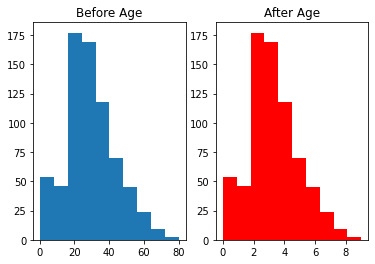

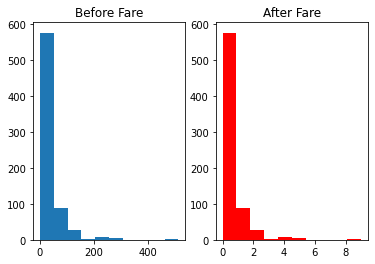

In [ ]:
discretize(10,"uniform")

Cross_val_score 0.6274843505477308


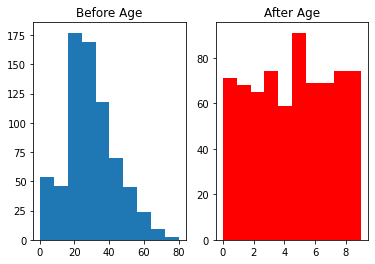

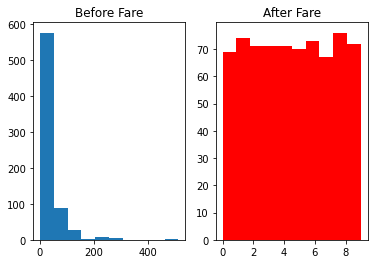

In [ ]:
discretize(10,'quantile')

Cross_val_score 0.6359154929577464


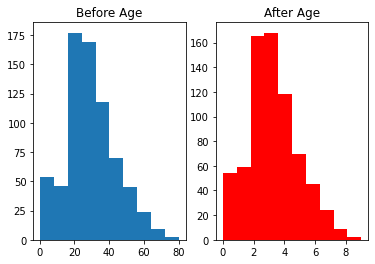

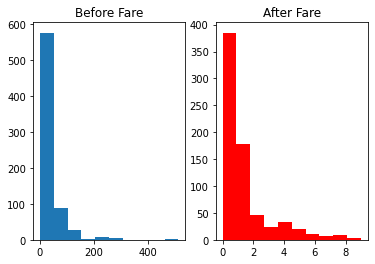

In [ ]:
discretize(10,'kmeans')

#### **Binarization**

In [ ]:
df_bin = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day32-binning-and-binarization/train.csv",usecols=["Age","Fare","SibSp","Parch","Survived"])
df_bin.head()

,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [ ]:
df_bin.isnull().sum() # Age 177 Null
df_bin.dropna(inplace=True)

In [ ]:
df_bin["Family"] = df_bin["SibSp"] + df_bin["Parch"]
df_bin.drop(columns=['SibSp','Parch'],inplace=True)
df_bin.head()

,Survived,Age,Fare,Family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0


In [ ]:
x_bina = df_bin.drop(columns="Survived")
y_bina = df_bin["Survived"]
x_bina.shape

(714, 3)

In [ ]:
from sklearn.model_selection import train_test_split
x_train_bina,x_test_bina,y_train_bina,y_test_bina = train_test_split(x_bina,y_bina,test_size=0.2,random_state=42)
x_train_bina.shape,x_test_bina.shape

((571, 3), (143, 3))

#### Without Binarization

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

clf = DecisionTreeClassifier()
clf.fit(x_train_bina,y_train_bina)
y_pred_bina = clf.predict(x_test_bina)

print("Accuracy_score",accuracy_score(y_test_bina,y_pred_bina))
print("cross_val_score",np.mean(cross_val_score(clf,x_bina,y_bina,cv=10,scoring='accuracy')))

Accuracy_score 0.6293706293706294
cross_val_score 0.6569053208137715


### Applying Binarization

In [ ]:
from sklearn.preprocessing import Binarizer

trf = ColumnTransformer([
    ('bin',Binarizer(copy=False),['Family'])
],remainder='passthrough')

x_train_trf_bina = trf.fit_transform(x_train_bina)
x_test_trf_bina = trf.transform(x_test_bina)

#### Apply Model

In [ ]:
clf_bina = DecisionTreeClassifier()
clf_bina.fit(x_train_trf_bina,y_train_bina)
y_pred_bina2 = clf_bina.predict(x_test_trf_bina)

print("Accuracy_score",accuracy_score(y_test_bina,y_pred_bina2))

x_trf_bina = trf.fit_transform(x_bina)
print("cross_val_score",np.mean(cross_val_score(clf_bina,x_trf_bina,y_bina,cv=10,scoring='accuracy')))

Accuracy_score 0.6013986013986014
cross_val_score 0.6318075117370892


###**Handling Mixed Variable**

In [ ]:
import numpy as np
import pandas as pd

df_hmv = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day33-handling-mixed-variables/titanic.csv")
df_hmv.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


#### Number Columns

In [ ]:
df_hmv["number"].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passengers traveling with')

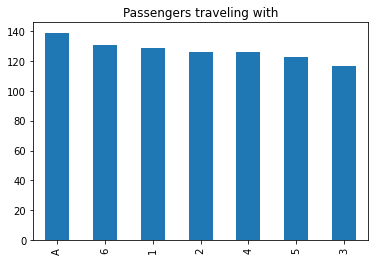

In [ ]:
# Visualize number unique value in number columns

fig = df_hmv["number"].value_counts().plot.bar() 
fig.set_title("Passengers traveling with")

In [ ]:
# Extract Numerical Part

df_hmv['number_numerical'] = pd.to_numeric(df_hmv["number"],errors='coerce',downcast='integer')

# Extract Categorical Part

df_hmv["number_categorical"] = np.where(df_hmv['number_numerical'].isnull(),df_hmv["number"],np.nan)
df_hmv.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


#### Cabin ,Ticket Columns

In [ ]:
df_hmv['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
df_hmv['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [ ]:
# Cabin Columns
# Capture Numerical Part
df_hmv["Cabin_num"] = df_hmv["Cabin"].str.extract('(\d+)')

# Capture the first letter of Categorical Part 
df_hmv["Cabin_cat"] = df_hmv["Cabin"].str[0]

df_hmv.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,Cabin_num,Cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


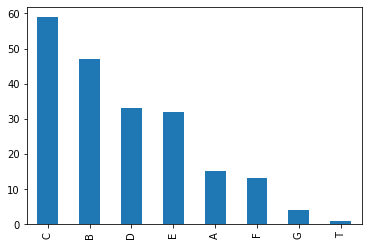

In [ ]:
# Visualization of Cabin_cat data
df_hmv['Cabin_cat'].value_counts().plot(kind='bar')

In [ ]:
# Ticket Columns
# Capture Numerical Part

df_hmv["Ticket_num"] = df_hmv['Ticket'].apply(lambda s:s.split()[-1])
df_hmv["Ticket_num"] = pd.to_numeric(df_hmv["Ticket_num"],
                                     errors='coerce',
                                     downcast='integer')
# Capture Categorical Part

df_hmv["Ticket_cat"] = df_hmv["Ticket"].apply(lambda s:s.split()[0])
df_hmv["Ticket_cat"] = np.where(df_hmv['Ticket_cat'].str.isdigit(),np.nan,df_hmv["Ticket_cat"])

df_hmv.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,Cabin_num,Cabin_cat,Ticket_num,Ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN


In [ ]:
df_hmv["Ticket_cat"].unique()

array(['A/5', 'PC', 'STON/O2.', nan, 'PP', 'A/5.', 'C.A.', 'A./5.',
       'SC/Paris', 'S.C./A.4.', 'A/4.', 'CA', 'S.P.', 'S.O.C.', 'SO/C',
       'W./C.', 'SOTON/OQ', 'W.E.P.', 'STON/O', 'A4.', 'C', 'SOTON/O.Q.',
       'SC/PARIS', 'S.O.P.', 'A.5.', 'Fa', 'CA.', 'LINE', 'F.C.C.', 'W/C',
       'SW/PP', 'SCO/W', 'P/PP', 'SC', 'SC/AH', 'A/S', 'A/4', 'WE/P',
       'S.W./PP', 'S.O./P.P.', 'F.C.', 'SOTON/O2', 'S.C./PARIS',
       'C.A./SOTON'], dtype=object)

### **Handling Date and Time Variables**

In [ ]:
import numpy as np
import pandas as pd

date = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day34-handling-date-and-time/orders.csv")
time = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day34-handling-date-and-time/messages.csv")

date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


In [ ]:
time.head()

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше


#### **---Working with Dates**
### **(date Dataset)**

In [ ]:
# Converting to datetime Datatype
date["date"] = pd.to_datetime(date["date"])
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   product_id  1000 non-null   int64         
 2   city_id     1000 non-null   int64         
 3   orders      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


#### Extract Year

In [ ]:
# Extract year
date['date_year'] = date['date'].dt.year
date[["date","date_year"]].sample(3)

,date,date_year
401,2018-12-31,2018
935,2019-10-30,2019
21,2018-08-19,2018


#### Extract Month

In [ ]:
# Extract Month
date["date_month_no"] = date["date"].dt.month
date[["date","date_year","date_month_no"]].sample(3)

,date,date_year,date_month_no
816,2019-02-15,2019,2
343,2019-03-22,2019,3
146,2019-12-13,2019,12


In [ ]:
date["date_month_name"] = date["date"].dt.month_name()
date[["date","date_year","date_month_no","date_month_name"]].sample(3)

,date,date_year,date_month_no,date_month_name
219,2019-07-26,2019,7,July
882,2019-10-14,2019,10,October
858,2019-07-13,2019,7,July


#### Extract Days

In [ ]:
# Extract Days
date["date_day"] = date["date"].dt.day
date[["date","date_year","date_month_name","date_day"]].sample(3)

,date,date_year,date_month_name,date_day
495,2018-11-09,2018,November,9
925,2018-12-27,2018,December,27
717,2019-07-24,2019,July,24


#### Day of Week

In [ ]:
# Day of week
date["date_dow"] = date["date"].dt.dayofweek
date[["date","date_year","date_month_name","date_day","date_dow"]].head(3)

,date,date_year,date_month_name,date_day,date_dow
0,2019-12-10,2019,December,10,1
1,2018-08-15,2018,August,15,2
2,2018-10-23,2018,October,23,1


In [ ]:
# Day of week name
date["date_dow_nm"] = date["date"].dt.day_name()
date[["date","date_year","date_month_name","date_day","date_dow","date_dow_nm"]].head(3)

,date,date_year,date_month_name,date_day,date_dow,date_dow_nm
0,2019-12-10,2019,December,10,1,Tuesday
1,2018-08-15,2018,August,15,2,Wednesday
2,2018-10-23,2018,October,23,1,Tuesday


In [ ]:
# is weekend?
date["date_is_weekend"] = np.where(date["date_dow_nm"].isin(["Sunday","Saturday"]),1,0)
date[["date","date_year","date_month_name","date_day","date_dow","date_dow_nm","date_is_weekend"]].head()

,date,date_year,date_month_name,date_day,date_dow,date_dow_nm,date_is_weekend
0,2019-12-10,2019,December,10,1,Tuesday,0
1,2018-08-15,2018,August,15,2,Wednesday,0
2,2018-10-23,2018,October,23,1,Tuesday,0
3,2019-08-17,2019,August,17,5,Saturday,1
4,2019-01-06,2019,January,6,6,Sunday,1


#### Extract week of the Year

In [ ]:
date["date_week"] = date["date"].dt.week
date[["date","date_year","date_month_name","date_day","date_dow_nm","date_week"]].sample(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


,date,date_year,date_month_name,date_day,date_dow_nm,date_week
128,2019-11-23,2019,November,23,Saturday,47
186,2019-05-30,2019,May,30,Thursday,22
333,2019-10-31,2019,October,31,Thursday,44


#### Extract Quarter

In [ ]:
date["quarter"] = date['date'].dt.quarter
date[["date","date_year","date_month_name","date_day","date_dow_nm","date_is_weekend","date_week","quarter"]].sample(3)

,date,date_year,date_month_name,date_day,date_dow_nm,date_is_weekend,date_week,quarter
822,2018-07-21,2018,July,21,Saturday,1,29,3
239,2019-02-19,2019,February,19,Tuesday,0,8,1
883,2019-12-04,2019,December,4,Wednesday,0,49,4


#### Extract Semester

In [ ]:
date["semester"] = np.where(date['quarter'].isin([1,2]),1,2)
date[["date","date_year","date_month_name","date_day","date_dow_nm","date_is_weekend","date_week","quarter","semester"]].sample(3)

,date,date_year,date_month_name,date_day,date_dow_nm,date_is_weekend,date_week,quarter,semester
375,2019-07-14,2019,July,14,Sunday,1,28,3,2
285,2018-10-19,2018,October,19,Friday,0,42,4,2
882,2019-10-14,2019,October,14,Monday,0,42,4,2


#### Extract Time elapsed between dates

In [ ]:
import datetime
today = datetime.datetime.today()
today

datetime.datetime(2022, 10, 22, 12, 50, 39, 142207)

In [ ]:
today - date["date"]

0     1047 days 12:50:39.142207
1     1529 days 12:50:39.142207
2     1460 days 12:50:39.142207
3     1162 days 12:50:39.142207
4     1385 days 12:50:39.142207
                 ...           
995   1475 days 12:50:39.142207
996   1416 days 12:50:39.142207
997   1264 days 12:50:39.142207
998   1329 days 12:50:39.142207
999   1103 days 12:50:39.142207
Name: date, Length: 1000, dtype: timedelta64[ns]

In [ ]:
(today - date['date']).dt.days

0      1047
1      1529
2      1460
3      1162
4      1385
       ... 
995    1475
996    1416
997    1264
998    1329
999    1103
Name: date, Length: 1000, dtype: int64

In [ ]:
# Month Passed
np.round((today - date['date']) / np.timedelta64(1,'M'),0)

0      34.0
1      50.0
2      48.0
3      38.0
4      46.0
       ... 
995    48.0
996    47.0
997    42.0
998    44.0
999    36.0
Name: date, Length: 1000, dtype: float64

#### **---Working with Time**
### **(time Dataset)**

In [ ]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [ ]:
# Change datatype
time['date'] = pd.to_datetime(time['date'])

#### Extract Hour ,Min ,Sec

In [ ]:
time['hour'] = time['date'].dt.hour
time['min'] = time['date'].dt.minute
time['sec'] = time['date'].dt.second

time[["date","hour","min","sec"]].sample(3)

,date,hour,min,sec
922,2012-11-11 23:14:00,23,14,0
985,2016-01-18 23:39:00,23,39,0
213,2016-12-09 23:20:00,23,20,0


#### Extract Time Part

In [ ]:
time['time'] = time['date'].dt.time
time[['date','time','hour','min','sec']].sample(3)

,date,time,hour,min,sec
91,2014-11-05 01:05:00,01:05:00,1,5,0
985,2016-01-18 23:39:00,23:39:00,23,39,0
507,2016-05-17 23:32:00,23:32:00,23,32,0


#### Time Difference

In [ ]:
(today - time['date']).head()

0   3233 days 12:00:39.142207
1   3097 days 13:10:39.142207
2   3583 days 12:29:39.142207
3   2885 days 12:19:39.142207
4   3282 days 13:39:39.142207
Name: date, dtype: timedelta64[ns]

In [ ]:
# In Seconds
((today - time['date']) / np.timedelta64(1,'s')).head()

0    2.793744e+08
1    2.676282e+08
2    3.096162e+08
3    2.493084e+08
4    2.836140e+08
Name: date, dtype: float64

In [ ]:
# In Minutes
((today - time['date']) / np.timedelta64(1,'m')).head()

0    4.656241e+06
1    4.460471e+06
2    5.160270e+06
3    4.155140e+06
4    4.726900e+06
Name: date, dtype: float64

In [ ]:
# In Min
((today - time['date']) / np.timedelta64(1,'m')).head()

0    4.656241e+06
1    4.460471e+06
2    5.160270e+06
3    4.155140e+06
4    4.726900e+06
Name: date, dtype: float64

In [ ]:
# In Hours
((today - time['date']) / np.timedelta64(1,'h')).head()

0    77604.010873
1    74341.177540
2    86004.494206
3    69252.327540
4    78781.660873
Name: date, dtype: float64

 ### **Handling Missing Data**
 **Missing Value**
 1.  **Remove Value**(Complete Case Analysis) **CCA**
 2.  **Imputer**
      1.  **Univarient** (SimpleImputer)
          *  **Numerical**
              *  Mean, Mediana
              *  Random
              *  Arbitary Value Imputation
          *  **Categorical**
              *  Most frequent value
              *  Missing string mention
      2.  **Multivarient**
          *  KNN Imputer
          *  Itterative Imputer(MISE)

#### **Remove Value** (Those have less than 5% data Missing)

In [ ]:
import numpy as np
import pandas as pd

df_rm = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day35-complete-case-analysis/data_science_job.csv")
df_rm.sample(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
12152,7287,city_114,0.926,Male,Has relevent experience,Full time course,Masters,STEM,15.0,100-500,Pvt Ltd,330.0,0.0
19083,27838,city_83,0.923,Male,No relevent experience,no_enrollment,Masters,STEM,20.0,10000+,Pvt Ltd,66.0,0.0
7155,14305,city_72,0.795,Male,Has relevent experience,no_enrollment,Graduate,STEM,10.0,<10,Pvt Ltd,16.0,0.0


In [ ]:
df_rm.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [ ]:
df_rm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [ ]:
df_rm.shape

(19158, 13)

In [ ]:
# Column have lessthan 5% Missing Value
cols = [ var for var in df_rm.columns if df_rm[var].isnull().mean() < 0.05 and df_rm[var].isnull().mean() > 0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [ ]:
# Percentage of data left after Remove Missing Value
(len(df_rm[cols].dropna()) / len(df_rm))*100

89.68577095730244

In [ ]:
# After Remove missing value
new_df_rm = df_rm[cols].dropna()
df_rm.shape,new_df_rm.shape

((19158, 13), (17182, 5))

### Visualization after and before Remove value

#### training_hours Columns

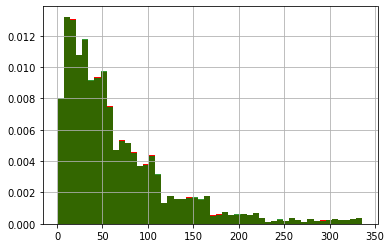

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


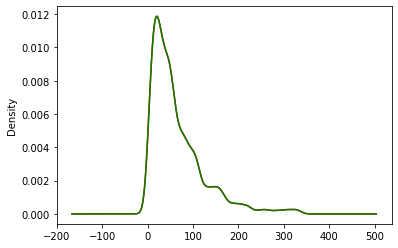

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111)

# Original Data
df_rm['training_hours'].hist(bins=50,ax=ax1,density=True,color='red')
# After CCA Data
new_df_rm['training_hours'].hist(bins=50,ax=ax1,color='green',density=True,alpha=0.8)# alpha use for Transparent
plt.show()

ax1 = fig.add_subplot(111)
# original data
df_rm['training_hours'].plot.density(color='red')
# data after cca
new_df_rm['training_hours'].plot.density(color='green')
plt.show()

#### experience Columns

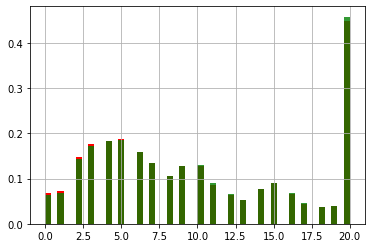

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


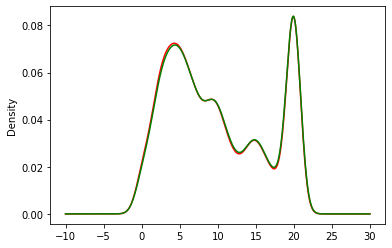

In [ ]:
fig = plt.figure()
ax2 = fig.add_subplot(111)
# Original Data
df_rm['experience'].hist(bins=50,ax=ax2,density=True,color='red')
# After CCA Data
new_df_rm['experience'].hist(bins=50,ax=ax2,color='green',density=True,alpha=0.8)
plt.show()

ax2 = fig.add_subplot(111)
# original data
df_rm['experience'].plot.density(color='red')
# data after cca
new_df_rm['experience'].plot.density(color='green')
plt.show()

#### education_level Columns

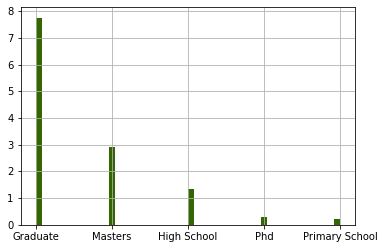

In [ ]:
fig = plt.figure()
ax3 = fig.add_subplot(111)
# Original Data
df_rm['education_level'].hist(bins=50,ax=ax3,density=True,color='red')
# After CCA Data
new_df_rm['education_level'].hist(bins=50,ax=ax3,color='green',density=True,alpha=0.8)
plt.show()

#### enrolled_university Columns

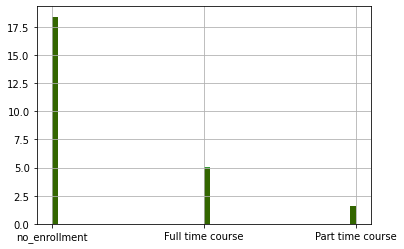

In [ ]:
fig = plt.figure()
ax4 = fig.add_subplot(111)
# Original Data
df_rm['enrolled_university'].hist(bins=50,ax=ax4,density=True,color='red')
# After CCA Data
new_df_rm['enrolled_university'].hist(bins=50,ax=ax4,color='green',density=True,alpha=0.8)
plt.show()

#### city_development_index Columns

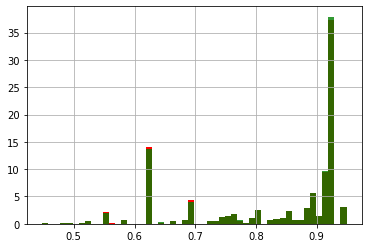

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


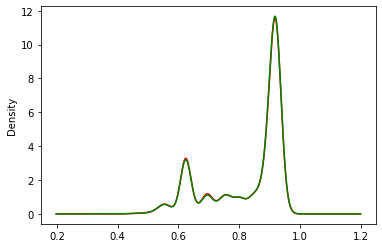

In [ ]:
fig = plt.figure()
ax5 = fig.add_subplot(111)
# Original Data
df_rm['city_development_index'].hist(bins=50,ax=ax5,density=True,color='red')
# After CCA Data
new_df_rm['city_development_index'].hist(bins=50,ax=ax5,color='green',density=True,alpha=0.8)
plt.show()

ax5 = fig.add_subplot(111)
# original data
df_rm['city_development_index'].plot.density(color='red')
# data after cca
new_df_rm['city_development_index'].plot.density(color='green')
plt.show()

### Percentage of Observations per Category

In [ ]:
temp = pd.concat([
    # percentage of observation per category, Original data
    df_rm['enrolled_university'].value_counts() / len(df_rm),
    # percentage of observation per category, CCA data
    new_df_rm['enrolled_university'].value_counts() / len(new_df_rm)
    ],axis=1)

temp.columns = ['original','cca']
temp

,original,cca
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [ ]:
temp = pd.concat([
    # percentage of observation per category, Original data
    df_rm['education_level'].value_counts() / len(df_rm),
    # percentage of observation per category, CCA data
    new_df_rm['education_level'].value_counts() / len(new_df_rm)

],axis=1)

temp.columns = ['original','cca']
temp

,original,cca
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


### **2. Univarient** (SimpleImputer)
  ####  **Numerical**
  *  Mean, Mediana
  *  Random
  *  Arbitary Value Imputation

### **Mean / Median imputation :**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_mean = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day36-imputing-numerical-data/titanic_toy.csv')
df_mean.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
df_mean.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [ ]:
x = df_mean.drop(columns=['Survived'])
y = df_mean['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train_mean,x_test_mean,y_train_mean,y_test_mean = train_test_split(x,y,test_size=0.2,random_state=2)
x_train_mean.shape,x_test_mean.shape

((712, 3), (179, 3))

### Without Using Sklearn
#### Age and Fare Columns

In [ ]:
# Using Data Frame find mean and median
mean_age = x_train_mean['Age'].mean()
median_age = x_train_mean['Age'].median()

mean_fare = x_train_mean['Fare'].mean()
median_fare = x_train_mean['Fare'].median()
print(f"Mean Age: {mean_age},    Median Age: {median_age} \nMean Fare: {mean_fare},   Median Fare: {median_fare}")

Mean Age: 29.78590425531915,    Median Age: 28.75 
Mean Fare: 32.61759689349112,   Median Fare: 14.4583


In [ ]:
# Filling null value
x_train_mean["Age_mean"] = x_train_mean["Age"].fillna(mean_age)
x_train_mean['Age_median'] = x_train_mean['Age'].fillna(median_age)

x_train_mean['Fare_mean'] = x_train_mean['Fare'].fillna(mean_fare)
x_train_mean['Fare_median'] = x_train_mean['Fare'].fillna(median_fare)
x_train_mean.sample(5)

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
517,NaN,24.1500,0,29.785904,28.75,24.1500,24.1500
733,23.0,13.0000,0,23.000000,23.00,13.0000,13.0000
645,48.0,76.7292,1,48.000000,48.00,76.7292,76.7292
529,23.0,11.5000,3,23.000000,23.00,11.5000,11.5000
268,58.0,153.4625,1,58.000000,58.00,153.4625,153.4625


In [ ]:
# Variance between original data and imputed data
print("Original Age variable variance",x_train_mean['Age'].var())
print("Mean Age variable variance",x_train_mean["Age_mean"].var())
print("Median Age variable variance",x_train_mean["Age_median"].var(),"\n")

print("Original Fare variable variance",x_train_mean['Fare'].var())
print("Mean Fare variable variance",x_train_mean["Fare_mean"].var())
print("Median Fare variable variance",x_train_mean["Fare_median"].var())

Original Age variable variance 204.34951339046142
Mean Age variable variance 161.81262452718676
Median Age variable variance 161.98956633460548 

Original Fare variable variance 2448.1979137063163
Mean Fare variable variance 2324.2385256705534
Median Fare variable variance 2340.09102197536


#### Visualization between original,mean and median
### Age Columns

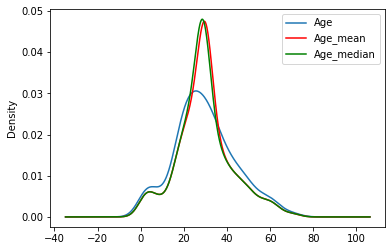

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original variable distribution
x_train_mean['Age'].plot(kind='kde',ax=ax)

# Imputed variable with mean
x_train_mean['Age_mean'].plot(kind='kde',ax=ax,color='red')

# Imputed variable with median
x_train_mean['Age_median'].plot(kind='kde',ax=ax,color='green')

# Add legends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### Fare Columns

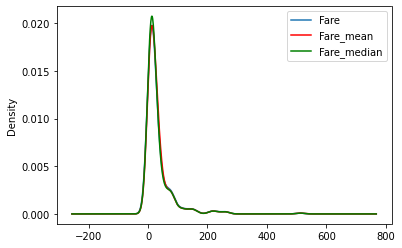

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original variable distribution
x_train_mean["Fare"].plot(kind ='kde',ax=ax)

# Imputed variable with mean
x_train_mean["Fare_mean"].plot(kind='kde',ax=ax,color='red')

# Imputed variable with median
x_train_mean["Fare_median"].plot(kind='kde',ax=ax,color='green')

# Add legend
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [ ]:
x_train_mean.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,55.603719,57.957599,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.146106,-5.112563,16.385048,16.476305
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Age_median,204.349513,57.957599,-5.112563,161.812625,161.989566,55.023037,53.553455
Fare_mean,66.665205,2448.197914,16.385048,52.788341,55.023037,2324.238526,2324.238526
Fare_median,64.858859,2448.197914,16.476305,51.358000,53.553455,2324.238526,2340.091022


In [ ]:
x_train_mean.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.090156,0.087356
Fare,0.092644,1.000000,0.208268,0.088069,0.091757,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.244610,-0.242883,0.205499,0.205942
Age_mean,1.000000,0.088069,-0.244610,1.000000,0.999454,0.086078,0.083461
Age_median,1.000000,0.091757,-0.242883,0.999454,1.000000,0.089673,0.086982
Fare_mean,0.090156,1.000000,0.205499,0.086078,0.089673,1.000000,0.996607
Fare_median,0.087356,1.000000,0.205942,0.083461,0.086982,0.996607,1.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


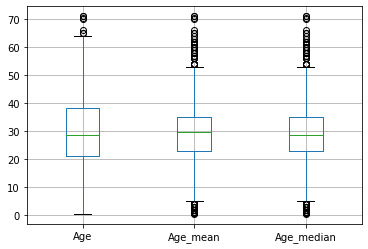

In [ ]:
# To find outliers
x_train_mean[['Age','Age_mean','Age_median']].boxplot()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


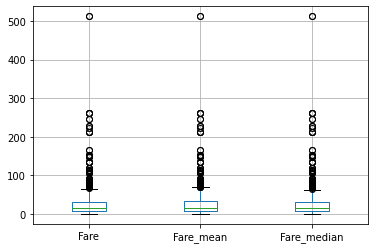

In [ ]:
x_train_mean[['Fare','Fare_mean','Fare_median']].boxplot()

### Using Sklearn

In [ ]:
from sklearn.model_selection import train_test_split
x_train_mean1,x_test_mean1,y_train_mean1,y_test_mean1 = train_test_split(x,y,test_size=0.2,random_state=2)
x_train_mean1.shape,x_test_mean1.shape

((712, 3), (179, 3))

In [ ]:
from sklearn.impute import SimpleImputer

imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [ ]:
from sklearn.compose import ColumnTransformer
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

trf.fit(x_train_mean1)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [ ]:
trf.named_transformers_['imputer1'].statistics_   # Median Age

array([28.75])

In [ ]:
trf.named_transformers_['imputer2'].statistics_   # Mean Age

array([32.61759689])

In [ ]:
x_train_mean1 = trf.transform(x_train_mean1)
x_test_mean1 = trf.transform(x_test_mean1)

In [ ]:
x_train_mean1

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

### **Arbitrary Value Imputation :**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_arb = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day36-imputing-numerical-data/titanic_toy.csv')
df_arb.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
df_arb.isnull().mean()*100

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [ ]:
x = df_arb.drop(columns=['Survived'])
y = df_arb['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train_arb,x_test_arb,y_tarin_arb,y_test_arb = train_test_split(x,y,test_size=0.2,random_state=2)
x_train_arb.shape,x_test_arb.shape

((712, 3), (179, 3))

### Without using Sklearn

In [ ]:
x_train_arb['Age_99'] = x_train_arb['Age'].fillna(99)
x_train_arb['Age_minus1'] = x_train_arb['Age'].fillna(-1)

x_train_arb['Fare_999'] = x_train_arb['Fare'].fillna(999)
x_train_arb['Fare_minus1'] = x_train_arb['Fare'].fillna(-1)
x_train_arb.sample(5)

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
202,34.0,6.4958,0,34.0,34.0,6.4958,6.4958
86,16.0,34.3750,4,16.0,16.0,34.3750,34.3750
416,34.0,32.5000,2,34.0,34.0,32.5000,32.5000
532,17.0,7.2292,2,17.0,17.0,7.2292,7.2292
44,19.0,7.8792,0,19.0,19.0,7.8792,7.8792


In [ ]:
print("Original Age variable variance :",x_train_arb['Age'].var())
print("Age variance 99 Imputation :",x_train_arb['Age_99'].var())
print("Age variance -1 Imputation :",x_train_arb['Age_minus1'].var(),"\n")

print("Original Fare variable variance :",x_train_arb['Fare'].var())
print("Fare variance 999 Imputation :",x_train_arb['Fare_999'].var())
print("Fare variance -1 Imputation :",x_train_arb['Fare_minus1'].var())

Original Age variable variance : 204.34951339046142
Age variance 99 Imputation : 951.7275570187188
Age variance -1 Imputation : 318.0896202624488 

Original Fare variable variance : 2448.1979137063163
Fare variance 999 Imputation : 47219.202652176304
Fare variance -1 Imputation : 2378.5676784883494


### Visualization between original and Arbitary value
#### Age Columns (99 and -1 imputation)

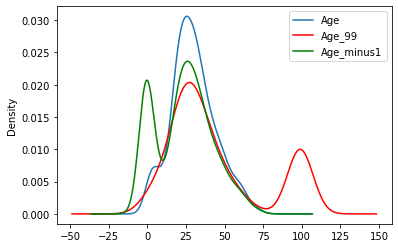

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original value distribution
x_train_arb['Age'].plot(kind='kde',ax=ax)

# Variable imputed with marked 99
x_train_arb['Age_99'].plot(kind='kde',ax=ax,color='red')

# Variable imputed with marked -1
x_train_arb['Age_minus1'].plot(kind='kde',ax=ax,color='green')

# add legends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

#### Fare Columns (999 and -1 imputation)

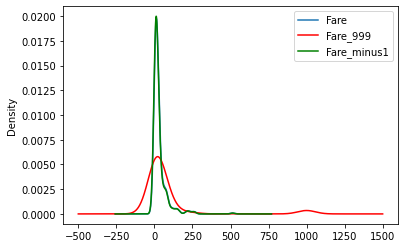

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original variable distribution
x_train_arb['Fare'].plot(kind='kde',ax=ax)

# Variable Imputed with marked 999
x_train_arb['Fare_999'].plot(kind='kde',ax=ax,color='red')

# Variable Imputed with marked -1
x_train_arb['Fare_minus1'].plot(kind='kde',ax=ax,color='green')

# add legends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [ ]:
x_train_arb.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [ ]:
x_train_arb.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


### With Using Sklearn

In [ ]:
from sklearn.model_selection import train_test_split
x_train_arb1,x_test_arb1,y_tarin_arb1,y_test_arb1 = train_test_split(x,y,test_size=0.2,random_state=2)
x_train_arb1.shape,x_test_arb1.shape

((712, 3), (179, 3))

In [ ]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [ ]:
from sklearn.compose import ColumnTransformer
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

trf.fit(x_train_arb1)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [ ]:
x_train_arb1 = trf.transform(x_train_arb1)
x_test_arb1 = trf.transform(x_test_arb1)

In [ ]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [ ]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [ ]:
x_train_arb1

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])

In [ ]:
x_train_arb1 = pd.DataFrame(x_train_arb1,columns=['Age','Fare','Family'])
x_train_arb1.head()

,Age,Fare,Family
0,40.0,27.7208,0.0
1,4.0,16.7000,2.0
2,47.0,9.0000,0.0
3,9.0,31.3875,6.0
4,20.0,9.8458,0.0


### Visualization between original and Arbitary value


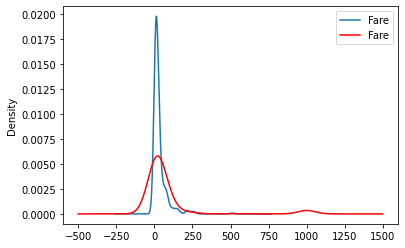

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original variable distribution
x_train_arb['Fare'].plot(kind='kde',ax=ax)

# Variable Imputed with marked 999
x_train_arb1['Fare'].plot(kind='kde',ax=ax,color='red')

# add legends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

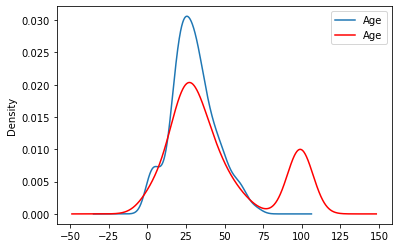

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original variable distribution
x_train_arb['Age'].plot(kind='kde',ax=ax)

# Variable Imputed with marked 999
x_train_arb1['Age'].plot(kind='kde',ax=ax,color='red')

# add legends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### **Random Imputation :**
**Numerical Data Missing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_ran = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day36-imputing-numerical-data/titanic_toy.csv',usecols=['Age','Fare','Survived'])
df_ran.head()

,Age,Fare,Survived
0,22.0,7.2500,0
1,38.0,71.2833,1
2,26.0,7.9250,1
3,35.0,53.1000,1
4,35.0,8.0500,0


In [ ]:
df_ran.isnull().mean()*100

Age         19.865320
Fare         5.050505
Survived     0.000000
dtype: float64

In [ ]:
x = df_ran.drop(columns='Survived')
y = df_ran['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train_ran,x_test_ran,y_train_ran,y_test_ran = train_test_split(x,y,test_size=0.2,random_state=2)
x_train_ran.shape,x_test_ran.shape

((712, 2), (179, 2))

In [ ]:
x_train_ran['Age_imputed'] = x_train_ran['Age']
x_test_ran['Age_imputed'] = x_test_ran['Age']
x_train_ran.tail()

,Age,Fare,Age_imputed
534,30.0,8.6625,30.0
584,NaN,8.7125,NaN
493,71.0,49.5042,71.0
527,NaN,221.7792,NaN
168,NaN,25.9250,NaN


##### **x_train_ran['Age_imputed'][x_train_ran['Age_imputed'].isnull()]**
**output---**   

              77    NaN
              868   NaN
              334   NaN
              295   NaN
              792   NaN
                    ..
       Age_imputed, Length: 148
##### **x_train_ran['Age'].shape**
**output---**  (712)
##### **x_train_ran['Age'].dropna()**
**output---**  Name: Age, Length: 564
##### **x_train_ran['Age'].dropna().sample(x_train_ran['Age'].isnull().sum()).values.shape**
**output---**  (148)

In [ ]:
x_train_ran['Age_imputed'][x_train_ran['Age_imputed'].isnull()] = x_train_ran['Age'].dropna().sample(x_train_ran['Age'].isnull().sum()).values
x_test_ran['Age_imputed'][x_test_ran['Age_imputed'].isnull()] = x_train_ran['Age'].dropna().sample(x_test_ran['Age'].isnull().sum()).values

In [ ]:
x_train_ran.sample(5)

,Age,Fare,Age_imputed
678,43.0,46.9000,43.0
610,39.0,31.2750,39.0
273,37.0,29.7000,37.0
882,22.0,10.5167,22.0
246,25.0,7.7750,25.0


### Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


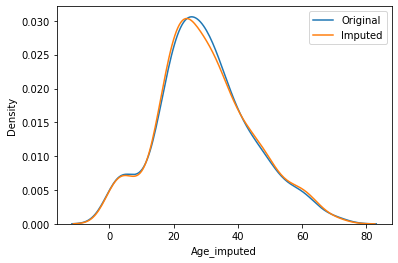

In [ ]:
import seaborn as sns
sns.distplot(x_train_ran["Age"],label='Original',hist=False)
sns.distplot(x_train_ran['Age_imputed'],label='Imputed',hist=False)
plt.legend()
plt.show()

In [ ]:
print('Original variable variance :',x_train_ran['Age'].var())
print('Variance after random imputation :',x_train_ran['Age_imputed'].var())

Original variable variance : 204.34951339046142
Variance after random imputation : 208.45518082144156


In [ ]:
x_train_ran[['Fare','Age','Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2448.197914,70.719262,64.509256
Age,70.719262,204.349513,204.349513
Age_imputed,64.509256,204.349513,208.455181


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


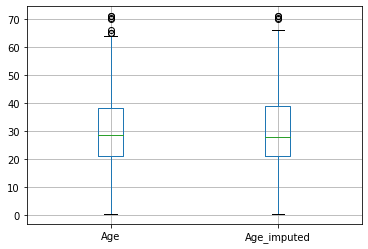

In [ ]:
x_train_ran[['Age','Age_imputed']].boxplot()

**Categorical Data Missing**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_ran1 = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day38-missing-indicator/house-train.csv",
                      usecols=['GarageQual','FireplaceQu','SalePrice'])
df_ran1.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [ ]:
df_ran1.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [ ]:
x = df_ran1
y = df_ran1['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split
x_train_ran1,x_test_ran1,y_train_ran1,y_test_ran1 = train_test_split(x,y,test_size = 0.2,random_state = 2)
x_train_ran1.shape,x_test_ran1.shape

((1168, 3), (292, 3))

In [ ]:
# Copy column to new column
x_train_ran1['GarageQual_imputed'] = x_train_ran1['GarageQual']
x_test_ran1['GarageQual_imputed'] = x_test_ran1['GarageQual']

x_train_ran1['FireplaceQu_imputed'] = x_train_ran1['FireplaceQu']
x_test_ran1['FireplaceQu_imputed'] = x_test_ran1['FireplaceQu']

In [ ]:
x_train_ran1.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
611,TA,TA,148000,TA,TA
1171,TA,TA,163000,TA,TA
601,Gd,TA,141000,TA,Gd
1005,NaN,TA,149900,TA,NaN
836,NaN,TA,153500,TA,NaN


#### For GarageQual_imputed

In [ ]:
x_train_ran1['GarageQual_imputed'][x_train_ran1['GarageQual_imputed'].isnull()] =x_train_ran1['GarageQual'].dropna().sample(x_train_ran1['GarageQual'].isnull().sum()).values

x_test_ran1['GarageQual_imputed'][x_test_ran1['GarageQual_imputed'].isnull()] = x_test_ran1['GarageQual'].dropna().sample(x_test_ran1['GarageQual'].isnull().sum()).values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
temp = pd.concat(
    [  x_train_ran1['GarageQual'].value_counts() / len(x_train_ran1['GarageQual'].dropna()),
       x_train_ran1['GarageQual_imputed'].value_counts() / len(x_train_ran1)
    ],axis=1)

temp.columns = ['original','imputed']
temp

,original,imputed
TA,0.951043,0.950342
Fa,0.037171,0.037671
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


#### For FireplaceQu_imputed

In [ ]:
x_train_ran1['FireplaceQu_imputed'][x_train_ran1['FireplaceQu_imputed'].isnull()] =x_train_ran1['FireplaceQu'].dropna().sample(x_train_ran1['FireplaceQu'].isnull().sum()).values

x_test_ran1['FireplaceQu_imputed'][x_test_ran1['FireplaceQu_imputed'].isnull()] = x_test_ran1['FireplaceQu'].dropna().sample(x_test_ran1['FireplaceQu'].isnull().sum()).values

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
temp = pd.concat(
    [  x_train_ran1['FireplaceQu_imputed'].value_counts() / len(x_train_ran1['FireplaceQu'].dropna()),
       x_train_ran1['FireplaceQu_imputed'].value_counts() / len(x_train_ran1)
    ],axis=1)

temp.columns = ['original','imputed']
temp

,original,imputed
Gd,0.945990,0.494863
TA,0.788871,0.412671
Fa,0.078560,0.041096
Ex,0.049100,0.025685
Po,0.049100,0.025685


#### Visualization between original and imputed value

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

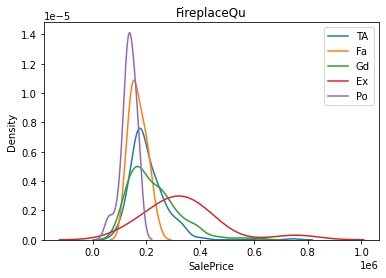

In [ ]:
import seaborn as sns
for category in x_train_ran1['FireplaceQu'].dropna().unique():
  sns.distplot(x_train_ran1[x_train_ran1['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.legend()
plt.title("FireplaceQu")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

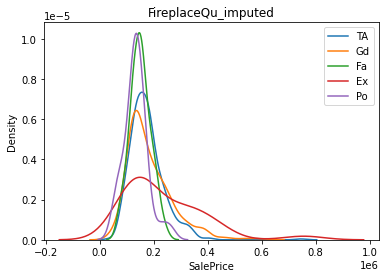

In [ ]:
for category in x_train_ran1['FireplaceQu_imputed'].dropna().unique():
  sns.distplot(x_train_ran1[x_train_ran1['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.legend()
plt.title("FireplaceQu_imputed")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

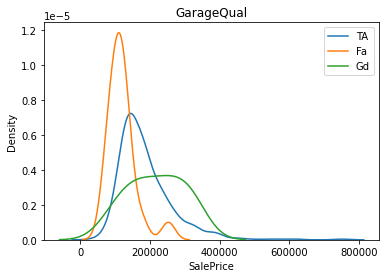

In [ ]:
for category in x_train_ran1['GarageQual'].dropna().unique():
  sns.distplot(x_train_ran1[x_train_ran1['GarageQual'] == category]['SalePrice'],hist=False,label=category)
plt.legend()
plt.title("GarageQual")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

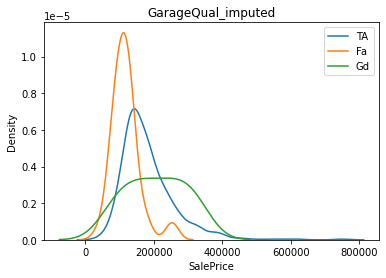

In [ ]:
for category in x_train_ran1['GarageQual_imputed'].dropna().unique():
  sns.distplot(x_train_ran1[x_train_ran1['GarageQual_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.legend(loc='best')
plt.title('GarageQual_imputed')
plt.show()

### **Categorical**
              *  Most frequent value
              *  Missing string mention

### **Missing Most frequent value**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_mi = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day38-missing-indicator/house-train.csv",
                    usecols=['GarageQual','FireplaceQu','SalePrice'])
df_mi.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [ ]:
df_mi.isnull().mean()

FireplaceQu    0.472603
GarageQual     0.055479
SalePrice      0.000000
dtype: float64

##### **For GarageQual Column**


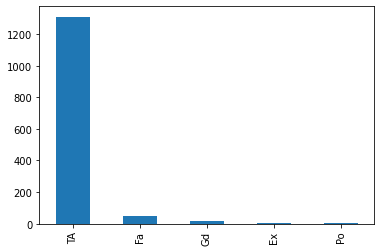

In [ ]:
df_mi['GarageQual'].value_counts().plot(kind='bar')

In [ ]:
df_mi['GarageQual'].mode()  # It give most frequent value

0    TA
dtype: object

#### Visualization of SalePrice having TA and NaN

Text(0.5, 1.0, 'GarageQual')

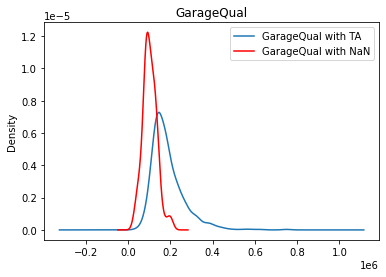

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_mi[df_mi['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)
df_mi[df_mi['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['GarageQual with TA','GarageQual with NaN']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')

In [ ]:
# Original value
temp = df_mi[df_mi['GarageQual']=='TA']['SalePrice']

In [ ]:
# Filling Null value (Imputed variable)
df_mi['GarageQual'].fillna('TA',inplace=True)

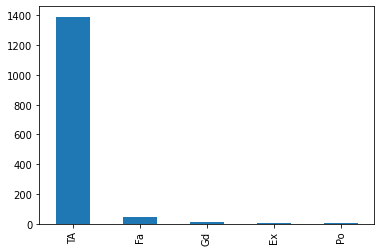

In [ ]:
df_mi['GarageQual'].value_counts().plot(kind='bar')

#### Visualization of SalePrice having TA with Original and Imputed value

Text(0.5, 1.0, 'GarageQual')

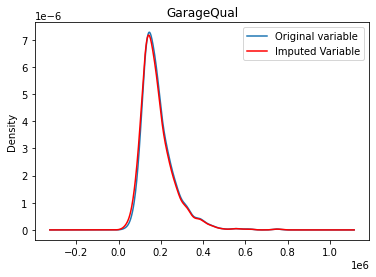

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)  # Original variable
# distribution of the variable after imputation
df_mi[df_mi['GarageQual'] == "TA"]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Original variable','Imputed Variable']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')

##### **For FireplaceQu Column**


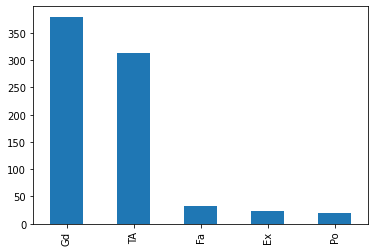

In [ ]:
# fireplaceQu most frequent_value
df_mi['FireplaceQu'].value_counts().plot(kind='bar')

In [ ]:
# Most frequent_value
df_mi['FireplaceQu'].mode()

0    Gd
dtype: object

#### Visualization of SalePrice with FireplaceQu having Gd and NaN

Text(0.5, 1.0, 'FireplaceQu')

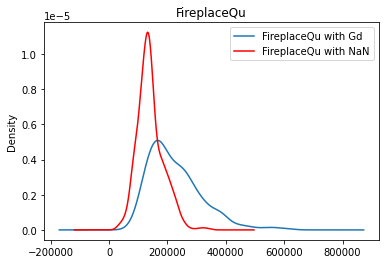

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_mi[df_mi['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)
df_mi[df_mi['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['FireplaceQu with Gd','FireplaceQu with NaN']
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')

In [ ]:
# Original value
temp1 = df_mi[df_mi['FireplaceQu'] == 'Gd']['SalePrice']

In [ ]:
# Filling Null value (Imputed variable)
df_mi['FireplaceQu'].fillna('Gd',inplace=True)

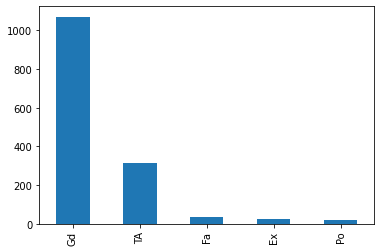

In [ ]:
df_mi['FireplaceQu'].value_counts().plot(kind='bar')

#### Visualization of SalePrice having Gd with Original and Imputed value

Text(0.5, 1.0, 'FireplaceQu')

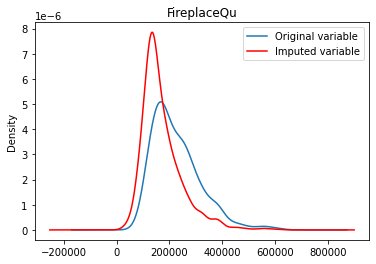

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp1.plot(kind='kde',ax=ax)
# Distribution of the variable after imputation
df_mi[df_mi['FireplaceQu'] == "Gd"]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Original variable','Imputed variable']
ax.legend(lines,labels,loc='best')
plt.title('FireplaceQu')

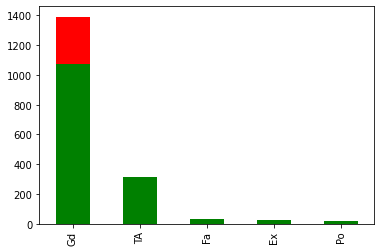

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_mi['GarageQual'].value_counts().plot(kind='bar',ax=ax,color='red')
df_mi['FireplaceQu'].value_counts().plot(kind='bar',ax=ax,color='green')

plt.show()

### Using Sklearn 

In [ ]:
x = df_mi.drop(columns=['SalePrice'])
y = df_mi['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split
x_train_mi,x_test_mi,y_train_mi,y_test_mi = train_test_split(x,y,test_size=0.2,random_state=2)
x_train_mi.shape,x_test_mi.shape

((1168, 2), (292, 2))

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

x_train_mi_imputed = imputer.fit_transform(x_train_mi)
x_test_mi_imputed = imputer.transform(x_train_mi)

x_train_mi_imputed.shape,x_test_mi_imputed.shape,imputer.statistics_

((1168, 2), (1168, 2), array(['Gd', 'TA'], dtype=object))

In [ ]:
x_train_mi_imputed = pd.DataFrame(x_train_mi_imputed,columns=['FireplaceQu','GarageQual'])
x_train_mi_imputed.head()

,FireplaceQu,GarageQual
0,TA,TA
1,Gd,TA
2,Fa,TA
3,Gd,TA
4,Gd,TA


#### Visualization of SalePrice with Original and Imputed value

Text(0.5, 1.0, 'FireplaceQu')

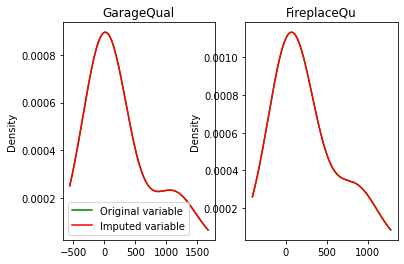

In [ ]:
plt.Figure()

ax = plt.subplot(121)
x_train_mi['GarageQual'].value_counts().plot(kind='kde',ax=ax,color='green')
x_train_mi_imputed['GarageQual'].value_counts().plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Original variable','Imputed variable']
ax.legend(lines,labels,loc='best')
plt.title('GarageQual')

plt.Figure()

ax1 = plt.subplot(122)
x_train_mi['FireplaceQu'].value_counts().plot(kind='kde',ax=ax1,color='green')
x_train_mi_imputed['FireplaceQu'].value_counts().plot(kind='kde',ax=ax1,color='red')

lines,labels = ax1.get_legend_handles_labels()
labels = ['Original variable','Imputed variable']
ax.legend(lines,labels,loc='best')
plt.title('FireplaceQu')


### **Missing string mention**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_str = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day38-missing-indicator/house-train.csv",
                    usecols=['GarageQual','FireplaceQu','SalePrice'])
df_str.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [ ]:
df_str.isnull().mean()*100 # Less than 5% missing value choose

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

#### Visualization of GarageQual

Text(0, 0.5, 'Number of houses')

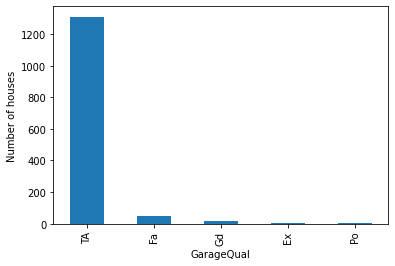

In [ ]:
df_str['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

##### **For GarageQual Column**


In [ ]:
df_str['GarageQual'].fillna('Missing',inplace=True)

#### Visualization of GarageQual missing category

Text(0, 0.5, 'Number of Houses')

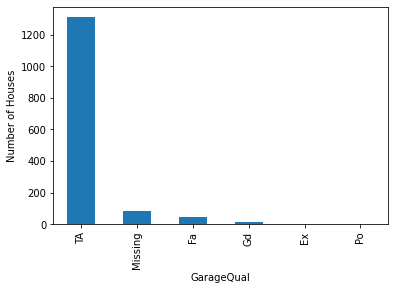

In [ ]:
df_str['GarageQual'].value_counts().sort_values(ascending = False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of Houses')

### Using Sklearn

In [ ]:
x = df_str.drop(columns=['SalePrice'])
y = df_str['SalePrice']

In [ ]:
from sklearn.model_selection import train_test_split
x_train_str,x_test_str,y_train_str,y_test_str = train_test_split(x,y,test_size=0.2,random_state=2)
x_train_str.shape,x_test_str.shape

((1168, 2), (292, 2))

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy ='constant',fill_value='missing')

x_train_str1 = imputer.fit_transform(x_train_str)
x_test_str1 = imputer.transform(x_test_str)

In [ ]:
imputer.statistics_

array(['missing', 'missing'], dtype=object)

In [ ]:
x_train_str1 = pd.DataFrame(x_train_str1,columns=['FireplaceQu','GarageQual'])
x_train_str1.head()

,FireplaceQu,GarageQual
0,TA,TA
1,missing,TA
2,Fa,TA
3,Gd,TA
4,Gd,TA


#### Visualization Original and Imputed value GarageQual and FireplaceQu

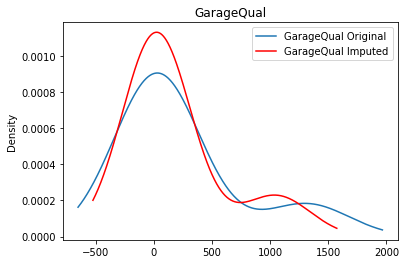

Text(0.5, 1.0, 'FireplaceQu')

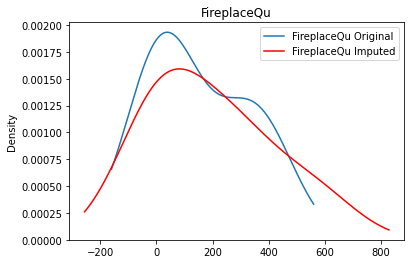

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

df_str['GarageQual'].value_counts().plot(kind='kde',ax=ax)
x_train_str1['GarageQual'].value_counts().plot(kind='kde',ax=ax,color='red')


lines,labels = ax.get_legend_handles_labels()
labels = ['GarageQual Original','GarageQual Imputed']
ax.legend(lines,labels,loc='best')

plt.title('GarageQual')
plt.show()

fig = plt.figure()
ax1 = fig.add_subplot(111)

df_str['FireplaceQu'].value_counts().plot(kind='kde',ax=ax1)
x_train_str1['FireplaceQu'].value_counts().plot(kind='kde',ax=ax1,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['FireplaceQu Original','FireplaceQu Imputed']
ax1.legend(lines,labels,loc='best')

plt.title('FireplaceQu')

### **Missing Indicators**

In [ ]:
import numpy as np
import pandas as pd
df_miss = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day38-missing-indicator/train.csv',usecols=['Age','Fare','Survived'])
df_miss.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
x = df_miss.drop(columns=['Survived'])
y = df_miss['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train_miss,x_test_miss,y_train_miss,y_test_miss = train_test_split(x,y,test_size=0.2,random_state=2)
x_train_miss.shape,x_test_miss.shape

((712, 2), (179, 2))

### Without using Indicator

In [ ]:
from sklearn.impute import SimpleImputer
si = SimpleImputer()
x_train_trf = si.fit_transform(x_train_miss)
x_test_trf = si.transform(x_test_miss)

In [ ]:
# model Apply
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train_trf,y_train_miss)

y_pred = clf.predict(x_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test_miss,y_pred)

0.6145251396648045

### Using Missing Indicator

In [ ]:
from sklearn.impute import MissingIndicator,SimpleImputer
mi = MissingIndicator()
mi.fit(x_train_miss)

MissingIndicator()

In [ ]:
mi.features_    # Which column have missing value

array([0])

In [ ]:
x_train_missing = mi.transform(x_train_miss)
x_test_missing = mi.transform(x_test_miss)

In [ ]:
x_train_miss['Age_NA'] = x_train_missing
x_test_miss['Age_NA'] = x_test_missing

In [ ]:
si = SimpleImputer()
x_train_trf2 = si.fit_transform(x_train_miss)
x_test_trf2 = si.transform(x_test_miss)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()

clf1.fit(x_train_trf2,y_train_miss)
y_pred1 = clf1.predict(x_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test_miss,y_pred1)

0.6312849162011173

### With SimpleImputer Missing Indicator

In [ ]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(add_indicator = True)
x_train_trf3 = si.fit_transform(x_train_miss)
x_test_trf3 = si.transform(x_test_miss)

In [ ]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression()

clf2.fit(x_train_trf3,y_train_miss)
y_pred2 = clf2.predict(x_test_trf3)

from sklearn.metrics import accuracy_score
accuracy_score(y_test_miss,y_pred2)

0.6312849162011173

## **Automatically Select value for imputation**:
### **-- Grid Search CV**

In [ ]:
import numpy as np
import pandas as pd

df_cv = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day38-missing-indicator/train.csv",
                    usecols=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])
df_cv.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
x = df_cv.drop(columns=['Survived'])
y = df_cv['Survived']

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train_cv,x_test_cv,y_train_cv,y_test_cv = train_test_split(x,y,test_size=0.2,random_state=2)
x_train_cv.shape,x_test_cv.shape

((712, 7), (179, 7))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

##### **Numerical Feature**

In [ ]:
numerical_features = ['Age','Fare']

numerical_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy = 'median')),
    ('scaler',StandardScaler())
])

##### **Categorical Feature**

In [ ]:
categorical_features = ['Embarked','Sex']

categorical_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy = 'most_frequent')),
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
# Use both the transformer for new Column_transformer
preprocessor = ColumnTransformer(transformers=[
    ('num',numerical_transformer,numerical_features),
    ('cat',categorical_transformer,categorical_features)
])

In [ ]:
clf = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())  ])

#### Display Pipeline

In [ ]:
from sklearn import set_config
set_config (display = 'diagram')
clf

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Embarked', 'Sex'])])),
                ('classifier', LogisticRegression())])

### Using GridSearchCV

In [ ]:
param_grid = {
    "preprocessor_num_imputer_strategy":['mean','median'],
    "preprocessor_cat_imputer_strategy":['most_frequent','constant'],
    'classifier_c':[0.1,1.0,10,100]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(clf,param_grid,cv=10)
grid.fit(x_train_cv,y_train_cv)

In [ ]:
print(f"Best params:")
print(grid.best_params_)

In [ ]:
cv_results = pd.DataFrame(grid.cv_results_)
cv_results = cv_results.sort_values("mean_test_score",ascending=False)
cv_results[['param_classifier_c','param_preprocessor_cat_imputer_strategy','param_preprocessor_num_imputer_strategy','mean_test_score']]

### **2. Multivarrient**
#### a) KNN Imputer
#### b) Itterative Imputer

#### **a) KNN Imputer**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_knn = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day39-knn-imputer/train.csv")[
    ['Age','Pclass','Fare','Survived']]
df_knn.head()

,Age,Pclass,Fare,Survived
0,22.0,3,7.2500,0
1,38.0,1,71.2833,1
2,26.0,3,7.9250,1
3,35.0,1,53.1000,1
4,35.0,3,8.0500,0


In [ ]:
df_knn.isnull().mean()*100

Age         19.86532
Pclass       0.00000
Fare         0.00000
Survived     0.00000
dtype: float64

In [ ]:
x = df_knn.drop(columns = ['Survived'])
y = df_knn['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
x_train_knn,x_test_knn,y_tain_knn,y_test_knn = train_test_split(x,y,test_size=0.2,random_state=2)
x_train_knn.shape,x_test_knn.shape

((712, 3), (179, 3))

**Using Knn imputer**


In [ ]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=3,weights='distance')

x_train_knn_trf = knn.fit_transform(x_train_knn)
x_test_knn_trf = knn.transform(x_test_knn)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(x_train_knn_trf,y_tain_knn)
y_pred2 = lr.predict(x_test_knn_trf) 

from sklearn.metrics import accuracy_score
accuracy_score(y_test_knn,y_pred2)

0.7150837988826816

##### **Comparision with SimpleImputer and KNN imputer**

In [ ]:
from sklearn.impute import SimpleImputer
si = SimpleImputer()

x_train_si_trf = si.fit_transform(x_train_knn)
x_test_si_trf = si.transform(x_test_knn)

In [ ]:
lr = LogisticRegression()

lr.fit(x_train_si_trf,y_tain_knn)
y_pred2 = lr.predict(x_test_si_trf)

accuracy_score(y_test_knn,y_pred2)

0.6927374301675978

#### **b) Itterative Imputer**

In [ ]:
import numpy as np
import pandas as pd

df = np.round(pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day40-iterative-imputer/50_Startups.csv')[
    ['R&D Spend','Administration','Marketing Spend','Profit']]/10000)
np.random.seed(9)
df_itt = df.sample(5)
df_itt

,R&D Spend,Administration,Marketing Spend,Profit
21,8.0,15.0,30.0,11.0
37,4.0,5.0,20.0,9.0
2,15.0,10.0,41.0,19.0
14,12.0,16.0,26.0,13.0
44,2.0,15.0,3.0,7.0


In [ ]:
df_itt = df_itt.iloc[:,0:-1]
df_itt

,R&D Spend,Administration,Marketing Spend
21,8.0,15.0,30.0
37,4.0,5.0,20.0
2,15.0,10.0,41.0
14,12.0,16.0,26.0
44,2.0,15.0,3.0


In [ ]:
df_itt.iloc[1,0] = np.NaN
df_itt.iloc[3,1] = np.NaN
df_itt.iloc[-1,-1] = np.NaN
df_itt.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,R&D Spend,Administration,Marketing Spend
21,8.0,15.0,30.0
37,NaN,5.0,20.0
2,15.0,10.0,41.0
14,12.0,NaN,26.0
44,2.0,15.0,NaN


#### **Stage--1** 
##### **Fill all the NaN values with mean of respective cols**

In [ ]:
df0 = pd.DataFrame()

df0['R&D Spend'] = df_itt['R&D Spend'].fillna(df_itt['R&D Spend'].mean())
df0['Administration'] = df_itt['Administration'].fillna(df_itt['Administration'].mean())
df0['Marketing Spend'] = df_itt['Marketing Spend'].fillna(df_itt['Marketing Spend'].mean())

#### **0th Itteration**

In [ ]:
df0

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,9.25,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.25,26.00
44,2.00,15.00,29.25


##### **Remove the col1 imputed value -- Imputed value (9.25)**


In [ ]:
df1 = df0.copy()
df1.iloc[1,0] = np.NaN  # Row 1 and column 0
df1

,R&D Spend,Administration,Marketing Spend
21,8.0,15.00,30.00
37,NaN,5.00,20.00
2,15.0,10.00,41.00
14,12.0,11.25,26.00
44,2.0,15.00,29.25


##### **Use first 3 rows to build amodel and use the last for prediction  (Except col1 imputed row)**


In [ ]:
x = df1.iloc[[0,2,3,4],1:3]  # take column 2 and 3
x

,Administration,Marketing Spend
21,15.00,30.00
2,10.00,41.00
14,11.25,26.00
44,15.00,29.25


In [ ]:
y = df1.iloc[[0,2,3,4],0]  # take column 1 as output
y

21     8.0
2     15.0
14    12.0
44     2.0
Name: R&D Spend, dtype: float64

##### **Predict the Missing value or NaN**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x,y)
lr.predict(df1.iloc[1,1:].values.reshape(1,2)) # [[5,10]] (row 1,col 2)

df1.iloc[1,0] = 23.14  # predicted value
df1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.14,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.25,26.00
44,2.00,15.00,29.25


##### **Remove the col2 imputed value -- Imputed value (11.25)**

In [ ]:
df1.iloc[3,1] = np.NaN
df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.0,30.00
37,23.14,5.0,20.00
2,15.00,10.0,41.00
14,12.00,NaN,26.00
44,2.00,15.0,29.25


##### **Use non imputed 3 rows to build amodel and use the imputed for prediction  (Except col2 imputed row)**


In [ ]:
x = df1.iloc[[0,1,2,4],[0,2]] # row- 0,1,2,4 col- 0,2 as input
x

,R&D Spend,Marketing Spend
21,8.00,30.00
37,23.14,20.00
2,15.00,41.00
44,2.00,29.25


In [ ]:
y = df1.iloc[[0,1,2,4],1]  #  row= 0,1,2,4  col=1 as input
y

21    15.0
37     5.0
2     10.0
44    15.0
Name: Administration, dtype: float64

##### **Predict the Missing value or NaN**

In [ ]:
lr = LinearRegression()
lr.fit(x,y)
lr.predict(df1.iloc[3,[0,2]].values.reshape(1,2))

df1.iloc[3,1] = 11.06
df1

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.14,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.06,26.00
44,2.00,15.00,29.25


##### **Remove the col3 imputed value -- Imputed value (29.25)**

In [ ]:
df1.iloc[4,-1] = np.NaN
df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.0
37,23.14,5.00,20.0
2,15.00,10.00,41.0
14,12.00,11.06,26.0
44,2.00,15.00,NaN


In [ ]:
x = df1.iloc[0:4,0:2]
x

,R&D Spend,Administration
21,8.00,15.00
37,23.14,5.00
2,15.00,10.00
14,12.00,11.06


In [ ]:
y = df1.iloc[0:4,-1]
y

21    30.0
37    20.0
2     41.0
14    26.0
Name: Marketing Spend, dtype: float64

##### **Predict the Missing value or NaN**

In [ ]:
lr = LinearRegression()
lr.fit(x,y)
lr.predict(df1.iloc[4,0:2].values.reshape(1,2))

df1.iloc[4,2] = 31.56

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


#### **1th Itteration**

In [ ]:
df1

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.14,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.06,26.00
44,2.00,15.00,31.56


##### **Substract 0th itteration from 1st itteration**

In [ ]:
df1 - df0   # The process continue whenever all the substraction value zero 

,R&D Spend,Administration,Marketing Spend
21,0.00,0.00,0.00
37,13.89,0.00,0.00
2,0.00,0.00,0.00
14,0.00,-0.19,0.00
44,0.00,0.00,2.31


#### **Stage--2** 
##### **- Take 1th itteration as primary**
##### **- take copy of 1th as 2nd itteration**
##### **- Remove the col1 imputed value -- Imputed value (9.25) and predict**


In [ ]:
df2 = df1.copy()
df2.iloc[1,0] = np.NaN
df2

,R&D Spend,Administration,Marketing Spend
21,8.0,15.00,30.00
37,NaN,5.00,20.00
2,15.0,10.00,41.00
14,12.0,11.06,26.00
44,2.0,15.00,31.56


In [ ]:
x = df2.iloc[[0,2,3,4],1:3]
y = df2.iloc[[0,2,3,4],0]

lr = LinearRegression()
lr.fit(x,y)
lr.predict(df2.iloc[1,1:].values.reshape(1,2))

df2.iloc[1,0] = 23.78

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


##### **- Remove the col2 imputed value -- Imputed value (11.06) and predict**


In [ ]:
df2.iloc[3,1] = np.NaN
df2

,R&D Spend,Administration,Marketing Spend
21,8.00,15.0,30.00
37,23.78,5.0,20.00
2,15.00,10.0,41.00
14,12.00,NaN,26.00
44,2.00,15.0,31.56


In [ ]:
x = df2.iloc[[0,1,2,4],[0,2]]
y = df2.iloc[[0,1,2,4],1]

lr = LinearRegression()
lr.fit(x,y)
lr.predict(df2.iloc[3,[0,2]].values.reshape(1,2))

df2.iloc[3,1] = 11.22

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


##### **- Remove the col3 imputed value -- Imputed value (31.56) and predict**


In [ ]:
df2.iloc[4,2] = np.NaN
df2

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.0
37,23.78,5.00,20.0
2,15.00,10.00,41.0
14,12.00,11.22,26.0
44,2.00,15.00,NaN


In [ ]:
x = df2.iloc[[0,1,2,3],[0,1]]
y = df2.iloc[[0,1,2,3],2]

lr = LinearRegression()
lr.fit(x,y)
lr.predict(df2.iloc[4,0:2].values.reshape(1,2))

df2.iloc[4,2] = 38.87

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


#### **2nd Itteration**


In [ ]:
df2

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,23.78,5.00,20.00
2,15.00,10.00,41.00
14,12.00,11.22,26.00
44,2.00,15.00,38.87


##### **Substract 1st itteration from 2nd itteration**

In [ ]:
df2 - df1

,R&D Spend,Administration,Marketing Spend
21,0.00,0.00,0.00
37,0.64,0.00,0.00
2,0.00,0.00,0.00
14,0.00,0.16,0.00
44,0.00,0.00,7.31


#### **Stage--3** 
##### **- Take 2nd itteration as primary**
##### **- take copy of 2nd as 3rd itteration**
##### **- Remove the col1 imputed value -- Imputed value (23.78) and predict**


In [ ]:
df3 = df2.copy()
df3.iloc[1,0] = np.NaN
df3

,R&D Spend,Administration,Marketing Spend
21,8.0,15.00,30.00
37,NaN,5.00,20.00
2,15.0,10.00,41.00
14,12.0,11.22,26.00
44,2.0,15.00,38.87


In [ ]:
x = df3.iloc[[0,2,3,4],1:3]
y = df3.iloc[[0,2,3,4],0]

lr = LinearRegression()
lr.fit(x,y)
lr.predict(df3.iloc[1,1:].values.reshape(1,2))

df3.iloc[1,0] = 26.82

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
df3.iloc[3,1] = np.NaN

x = df3.iloc[[0,1,2,4],[0,2]]
y = df3.iloc[[0,1,2,4],1]

lr = LinearRegression()
lr.fit(x,y)
lr.predict(df3.iloc[3,[0,2]].values.reshape(1,2))

df3.iloc[3,1] = 12.22

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
df3.iloc[4,-1] = np.NaN

x = df3.iloc[0:4,0:2]
y = df3.iloc[0:4,-1]

lr = LinearRegression()
lr.fit(x,y)
lr.predict(df3.iloc[4,0:2].values.reshape(1,2))

df3.iloc[4,-1] = 62.65

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


#### **2nd Itteration**

In [ ]:
df3

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,26.82,5.00,20.00
2,15.00,10.00,41.00
14,12.00,12.22,26.00
44,2.00,15.00,62.65


##### **Substract 2nd itteration from 3rd itteration**

In [ ]:
df3 - df2

,R&D Spend,Administration,Marketing Spend
21,0.00,0.0,0.00
37,3.04,0.0,0.00
2,0.00,0.0,0.00
14,0.00,1.0,0.00
44,0.00,0.0,23.78


#### **Stage--4** 
##### **- Take 3rd itteration as primary**
##### **- take copy of 3rd as 4th itteration**
##### **- Remove the col1 imputed value -- Imputed value (26.82) and predict**


In [ ]:
df4 = df3.copy()
df4.iloc[1,0] = np.NaN
df4

,R&D Spend,Administration,Marketing Spend
21,8.0,15.00,30.00
37,NaN,5.00,20.00
2,15.0,10.00,41.00
14,12.0,12.22,26.00
44,2.0,15.00,62.65


In [ ]:
x = df4.iloc[[0,2,3,4],1:3]
y = df4.iloc[[0,2,3,4],0]

lr = LinearRegression()
lr.fit(x,y)
lr.predict(df4.iloc[1,1:].values.reshape(1,2))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([26.63775124])

In [ ]:
df4.iloc[1,0] = 26.63
df4.iloc[3,1] = np.NaN

x = df4.iloc[[0,1,2,4],[0,2]]
y = df4.iloc[[0,1,2,4],1]

lr = LinearRegression()
lr.fit(x,y)
lr.predict(df4.iloc[3,[0,2]].values.reshape(1,2))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([13.06518912])

In [ ]:
df4.iloc[3,1] = 13.06
df4.iloc[4,-1] = np.NaN

x = df4.iloc[0:4,0:2]
y = df4.iloc[0:4,-1]

lr = LinearRegression()
lr.fit(x,y)
lr.predict(df4.iloc[4,0:2].values.reshape(1,2))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([71.13142222])

#### **3rd Itteration**

In [ ]:
df4.iloc[4,-1] = 71.13
df4

,R&D Spend,Administration,Marketing Spend
21,8.00,15.00,30.00
37,26.63,5.00,20.00
2,15.00,10.00,41.00
14,12.00,13.06,26.00
44,2.00,15.00,71.13


##### **Substract 3rd itteration from 4th itteration**

In [ ]:
df4 - df3

,R&D Spend,Administration,Marketing Spend
21,0.00,0.00,0.00
37,-0.19,0.00,0.00
2,0.00,0.00,0.00
14,0.00,0.84,0.00
44,0.00,0.00,8.48


In [ ]:
https://sites.google.com/view/datascience-cheat-sheets/machine-learning_1?authuser=0

# Practice Sql

https://www.sql-practice.com/

https://8weeksqlchallenge.com/

https://datalemur.com/

